In [66]:
import json
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# 데이터 전처리및 머신러닝을 위한 모듈
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error




In [67]:
# 넥슨 api 키
api_key = api_key
headers = {'Authorization': api_key}


In [7]:
# 각 시즌별로 top 1000의 플레이어의 공식 경기의 30경기 크롤링
# TOP 1000 이름 목록 가져오기
def top_1000_player():
    names = []
    for k in range(1, 51):
        url = f'https://fifaonline4.nexon.com/datacenter/rank?n4seasonno=49&n4pageno={k}'
        soup = BeautifulSoup(urlopen(url), 'html.parser')
        outer = soup.find_all(attrs={'class': 'name profile_pointer'})
        
        for i in range(20):
            names.append(outer[i].text)
    # TOP 1000 고유ID 가져오기
    uniqID = []
    for name in names:
        try:
            url = "https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname="
            nickName = name
            full = url + nickName
            
            resGet = requests.get(full, headers = headers)
            resJson = resGet.json()
            uniqID.append(resJson["accessId"])
        except:
            continue
    return uniqID

# TOP 1000 인당 공식 경기ID 30개씩 가져오기
def match_result(uniqID):
    matchID = []
    for iD in uniqID:
        accessid = iD
        match = 50
        offset = 0 
        limit = 30
        full = f"https://api.nexon.co.kr/fifaonline4/v1.0/users/{accessid}/matches?matchtype={match}&offset={offset}&limit={limit}"
        
        resGet = requests.get(full, headers = headers)
        resJson = resGet.json()
        matchID.append(resJson)
    
    # 각 경기 데이터 가져오기
    matchData = []
    for md in matchID:
        for mdi in md:
            url = f"https://api.nexon.co.kr/fifaonline4/v1.0/matches/{mdi}"
            match_url = requests.get(url, headers = headers)
            match_json = match_url.json()
            match_detail = pd.DataFrame(match_json)
            for i in range(2):
                if len(match_detail) == 2:
                    b0 = {'matchId': match_detail['matchId'][0]}
                    d0 = {"nickname": match_detail['matchInfo'][i]['nickname']}
                    d1 = match_detail['matchInfo'][i]['matchDetail']
                    d2 = match_detail['matchInfo'][i]['shoot']
                    d3 = match_detail['matchInfo'][i]['pass']
                    d4 = match_detail['matchInfo'][i]['defence']
                
                    dic = dict(b0, **d0, **d1, **d2, **d3, **d4)
                    matchData.append(dic)
    
    raw_df = pd.DataFrame(matchData)
    return raw_df.to_csv('zero_ml_raw.csv', encoding='cp949')

In [69]:
#%% 프로선수 SaddlerJungmin, 랭커 캉테아부지 데이터 가져오기
def get_player(name, offset, limit):
    uniqID = []
    url = "https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname="
    nickName = name
    full = url + nickName
    
    resGet = requests.get(full, headers = headers)
    resJson = resGet.json()
    uniqID.append(resJson["accessId"])
    
    matchID = []
    for iD in uniqID:
        accessid = iD
        match = 50
        offset = offset
        limit = limit
        full = f"https://api.nexon.co.kr/fifaonline4/v1.0/users/{accessid}/matches?matchtype={match}&offset={offset}&limit={limit}"
        
        resGet = requests.get(full, headers = headers)
        resJson = resGet.json()
        matchID.append(resJson)
    
    global matchData
    matchData = []
    for md in matchID:
        for mdi in md:
            url = f"https://api.nexon.co.kr/fifaonline4/v1.0/matches/{mdi}"
            match_url = requests.get(url, headers = headers)
            match_json = match_url.json()
            match_detail = pd.DataFrame(match_json)
            for i in range(2):
                if len(match_detail) == 2:
                    b0 = {'matchId': match_detail['matchId'][0]}
                    d0 = {"nickname": match_detail['matchInfo'][i]['nickname']}
                    d1 = match_detail['matchInfo'][i]['matchDetail']
                    d2 = match_detail['matchInfo'][i]['shoot']
                    d3 = match_detail['matchInfo'][i]['pass']
                    d4 = match_detail['matchInfo'][i]['defence']
                
                    dic = dict(b0, **d0, **d1, **d2, **d3, **d4)
                    matchData.append(dic)
                else:
                    print(matchID.index(md))

# get_player('SaddlerJungmin', 500, 100)
# raw_fin_pro_tmp1 = matchData
# get_player('SaddlerJungmin', 600, 100)
# raw_fin_pro_tmp2 = matchData
# raw_fin_pro_df = pd.DataFrame(raw_fin_pro_tmp1 + raw_fin_pro_tmp2)
# raw_fin_pro_df.to_csv('zero_ml_pro_raw.csv', encoding='cp949')

# get_player('캉테아부지', 500, 100)
# get_player('캉테아부지', 600, 100)
# raw_fin_ama_df = pd.DataFrame(matchData)
# raw_fin_ama_df.to_csv('zero_ml_ama_raw_0513.csv', encoding='cp949')get_player('캉테아부지', 500, 100)
get_player('캉테아부지', 500, 100)
raw_fin_ama_tmp1 = matchData
get_player('캉테아부지', 600, 100)
raw_fin_ama_tmp2 = matchData
raw_fin_ama_df = pd.DataFrame(raw_fin_ama_tmp1 + raw_fin_ama_tmp2)
raw_fin_ama_df.to_csv('zero_ml_ama_raw_0513.csv', encoding='cp949')

NameError: name 'headers' is not defined

In [77]:
#%% 데이터 전처리
raw_df02 = pd.read_csv('zero_ml_raw.csv', encoding='cp949', index_col=0)
raw_df02.info()
raw_df02.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58436 entries, 0 to 58435
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   58436 non-null  object 
 1   nickname                  58436 non-null  object 
 2   seasonId                  58436 non-null  int64  
 3   matchResult               58436 non-null  object 
 4   matchEndType              58436 non-null  int64  
 5   systemPause               58436 non-null  int64  
 6   foul                      58436 non-null  int64  
 7   injury                    58436 non-null  int64  
 8   redCards                  58436 non-null  int64  
 9   yellowCards               58436 non-null  int64  
 10  dribble                   58436 non-null  int64  
 11  cornerKick                58436 non-null  int64  
 12  possession                58436 non-null  int64  
 13  offsideCount              58436 non-null  int64  
 14  averag

Index(['matchId', 'nickname', 'seasonId', 'matchResult', 'matchEndType',
       'systemPause', 'foul', 'injury', 'redCards', 'yellowCards', 'dribble',
       'cornerKick', 'possession', 'offsideCount', 'averageRating',
       'controller', 'shootTotal', 'effectiveShootTotal', 'shootOutScore',
       'goalTotal', 'goalTotalDisplay', 'ownGoal', 'shootHeading',
       'goalHeading', 'shootFreekick', 'goalFreekick', 'shootInPenalty',
       'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty',
       'shootPenaltyKick', 'goalPenaltyKick', 'passTry', 'passSuccess',
       'shortPassTry', 'shortPassSuccess', 'longPassTry', 'longPassSuccess',
       'bouncingLobPassTry', 'bouncingLobPassSuccess', 'drivenGroundPassTry',
       'drivenGroundPassSuccess', 'throughPassTry', 'throughPassSuccess',
       'lobbedThroughPassTry', 'lobbedThroughPassSuccess', 'blockTry',
       'blockSuccess', 'tackleTry', 'tackleSuccess'],
      dtype='object')

In [3]:
raw_df = pd.read_csv('zero_ml_raw.csv', encoding='cp949', index_col=0)
raw_df.columns

print(len(raw_df[raw_df['matchResult'] == '오류']))
print(len(raw_df[raw_df['matchResult'] == '무']))
print(len(raw_df[raw_df['matchEndType'] != 0]))

raw_df = raw_df.drop(index=raw_df[raw_df['matchEndType'] != 0].index)
raw_df = raw_df.drop(index=raw_df[raw_df['matchResult'] == '무'].index)
raw_df.reset_index(drop=True, inplace=True)

raw_df.duplicated().sum()
raw_df = raw_df.drop_duplicates()
# 승, 패 전처리
raw_df['matchResult'].replace('승', 1, inplace=True)
raw_df['matchResult'].replace('패', 0, inplace=True)

raw_df.info()
raw_df.columns
# 필요 없는 데이터 컬럼들 삭제
pre_df = raw_df.drop(['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
                      'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
                      'goalOutPenalty', 'goalPenaltyKick', 'averageRating'], axis=1)

85
4502
7932
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41620 entries, 0 to 46001
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   41620 non-null  object 
 1   nickname                  41620 non-null  object 
 2   seasonId                  41620 non-null  int64  
 3   matchResult               41620 non-null  int64  
 4   matchEndType              41620 non-null  int64  
 5   systemPause               41620 non-null  int64  
 6   foul                      41620 non-null  int64  
 7   injury                    41620 non-null  int64  
 8   redCards                  41620 non-null  int64  
 9   yellowCards               41620 non-null  int64  
 10  dribble                   41620 non-null  int64  
 11  cornerKick                41620 non-null  int64  
 12  possession                41620 non-null  int64  
 13  offsideCount              41620 non-null  int64 

In [8]:
### 내꺼내꺼
raw_df = pd.read_csv('zero_ml_raw.csv', encoding='cp949', index_col=0)
raw_df.columns

print(len(raw_df[raw_df['matchResult'] == '오류']))
print(len(raw_df[raw_df['matchResult'] == '무']))
print(len(raw_df[raw_df['matchEndType'] != 0]))

raw_df = raw_df.drop(index=raw_df[raw_df['matchEndType'] != 0].index)
raw_df = raw_df.drop(index=raw_df[raw_df['matchResult'] == '무'].index)
raw_df.reset_index(drop=True, inplace=True)

raw_df.duplicated().sum()
raw_df = raw_df.drop_duplicates()
# 승, 패 전처리
raw_df['matchResult'].replace('승', 1, inplace=True)
raw_df['matchResult'].replace('패', 0, inplace=True)

raw_df.info()
raw_df.columns
tmp = ['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
                      'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
                      'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'drivenGroundPassSuccess',
             'shortPassSuccess', 'lobbedThroughPassSuccess', 'bouncingLobPassSuccess']
len(tmp)
# 필요 없는 데이터 컬럼들 삭제
pre_df = raw_df.drop(tmp, axis=1)

85
4502
7932
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41620 entries, 0 to 46001
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   41620 non-null  object 
 1   nickname                  41620 non-null  object 
 2   seasonId                  41620 non-null  int64  
 3   matchResult               41620 non-null  int64  
 4   matchEndType              41620 non-null  int64  
 5   systemPause               41620 non-null  int64  
 6   foul                      41620 non-null  int64  
 7   injury                    41620 non-null  int64  
 8   redCards                  41620 non-null  int64  
 9   yellowCards               41620 non-null  int64  
 10  dribble                   41620 non-null  int64  
 11  cornerKick                41620 non-null  int64  
 12  possession                41620 non-null  int64  
 13  offsideCount              41620 non-null  int64 

In [9]:
raw_df.tail()

matchId nickname  seasonId  matchResult  matchEndType  \
45997  626cf8f412d0673c3dee8610  Aegis호기    202205            0             0   
45998  626cf440891d0a33936f18e6       구씨    202205            0             0   
45999  626cf440891d0a33936f18e6    역대급행운    202205            1             0   
46000  626cee29ab8543d23a1cbfe0  매콤한슛우리흥    202205            0             0   
46001  626cee29ab8543d23a1cbfe0    역대급행운    202205            1             0   

       systemPause  foul  injury  redCards  yellowCards  ...  \
45997            1     0       1         0            0  ...   
45998            0     0       0         0            0  ...   
45999            1     0       0         0            0  ...   
46000            1     0       1         0            0  ...   
46001            0     1       0         0            0  ...   

       drivenGroundPassTry  drivenGroundPassSuccess  throughPassTry  \
45997                    2                        2              19   
45998                    2                        2              13   
45999                    3                        3              22   
46000                    0                        0              12   
46001                    6                        6              13   

       throughPassSuccess  lobbedThroughPassTry lobbedThroughPassSuccess  \
45997                  17                     3                        2   
45998                   8                     3                        1   
45999                  17                     3                        2   
46000                  12                     1                        0   
46001                  13                     2                        2   

       blockTry  blockSuccess  tackleTry  tackleSuccess  
45997         8             0          9              5  
45998         6             0          6              3  
45999         7             0          4              3  
46000         9             1         11              3  
46001         9             1          5              4  

[5 rows x 50 columns]

In [79]:
tmp = ['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
                      'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
                      'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'drivenGroundPassSuccess',
             'shortPassSuccess', 'lobbedThroughPassSuccess', 'bouncingLobPassSuccess']
len(tmp)

20

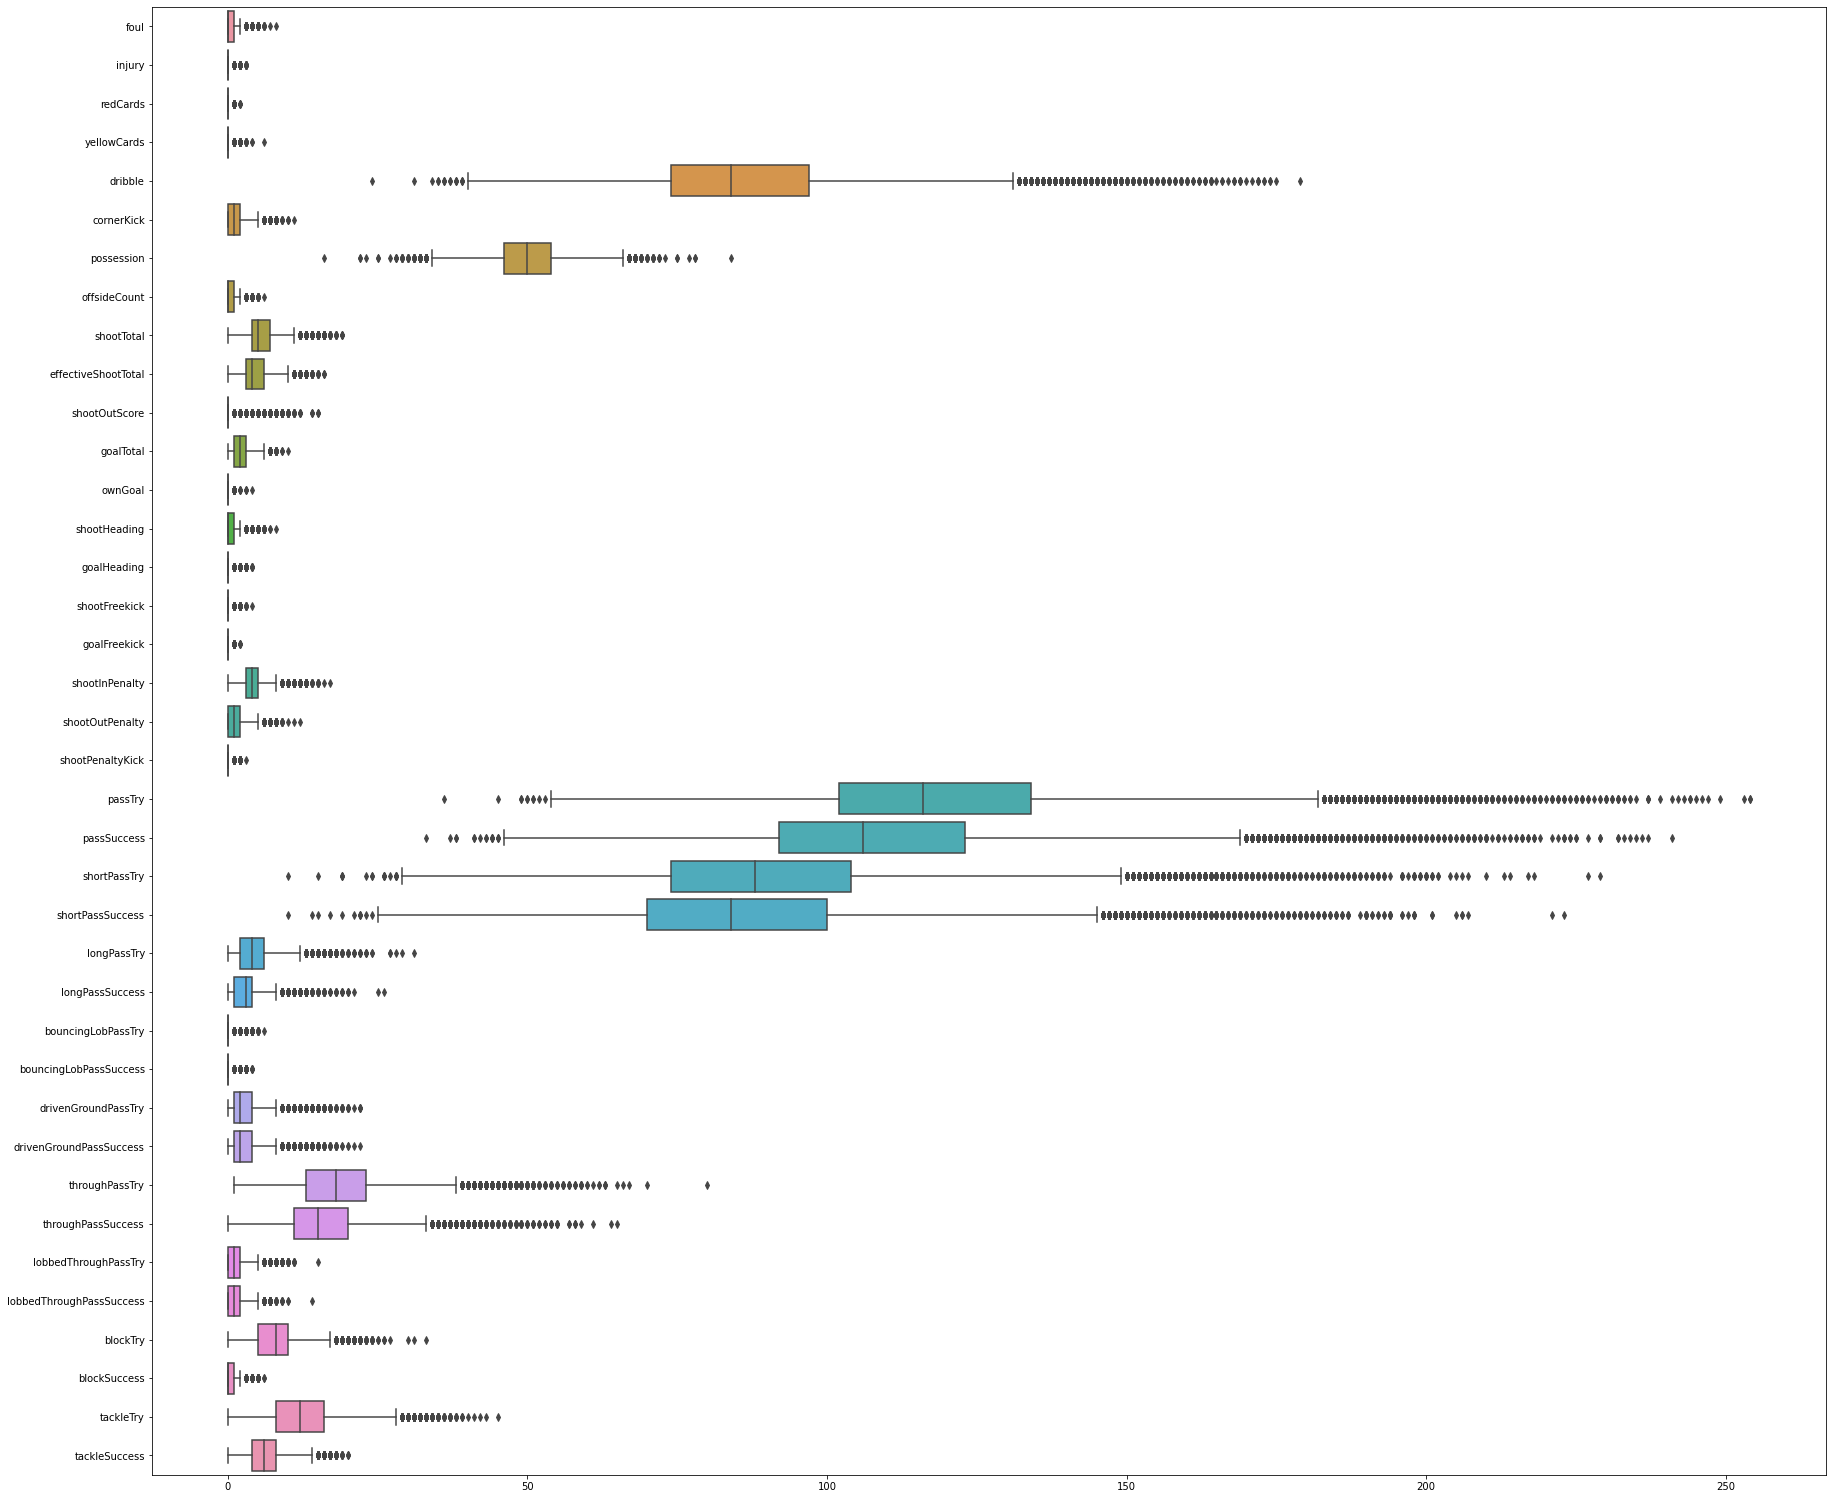

In [13]:
# 각 컬럼별 이상치 확인. 굉장히 이상치가 많은 것을 확인할 수 있음
plt.figure(figsize = (30, 27))
sns.boxplot(data = pre_df, orient='h')
plt.show()


In [10]:
# 이상치 제거 함수
def remove_out(pre_df):
    for i in pre_df.columns:
        q1 = pre_df[i].quantile(0.25)
        q3 = pre_df[i].quantile(0.75)
        iqr = q3-q1
        condition = pre_df[i]>q3+1.5*iqr
        a = pre_df[condition].index
        pre_df.drop(a, inplace=True)
    return pre_df


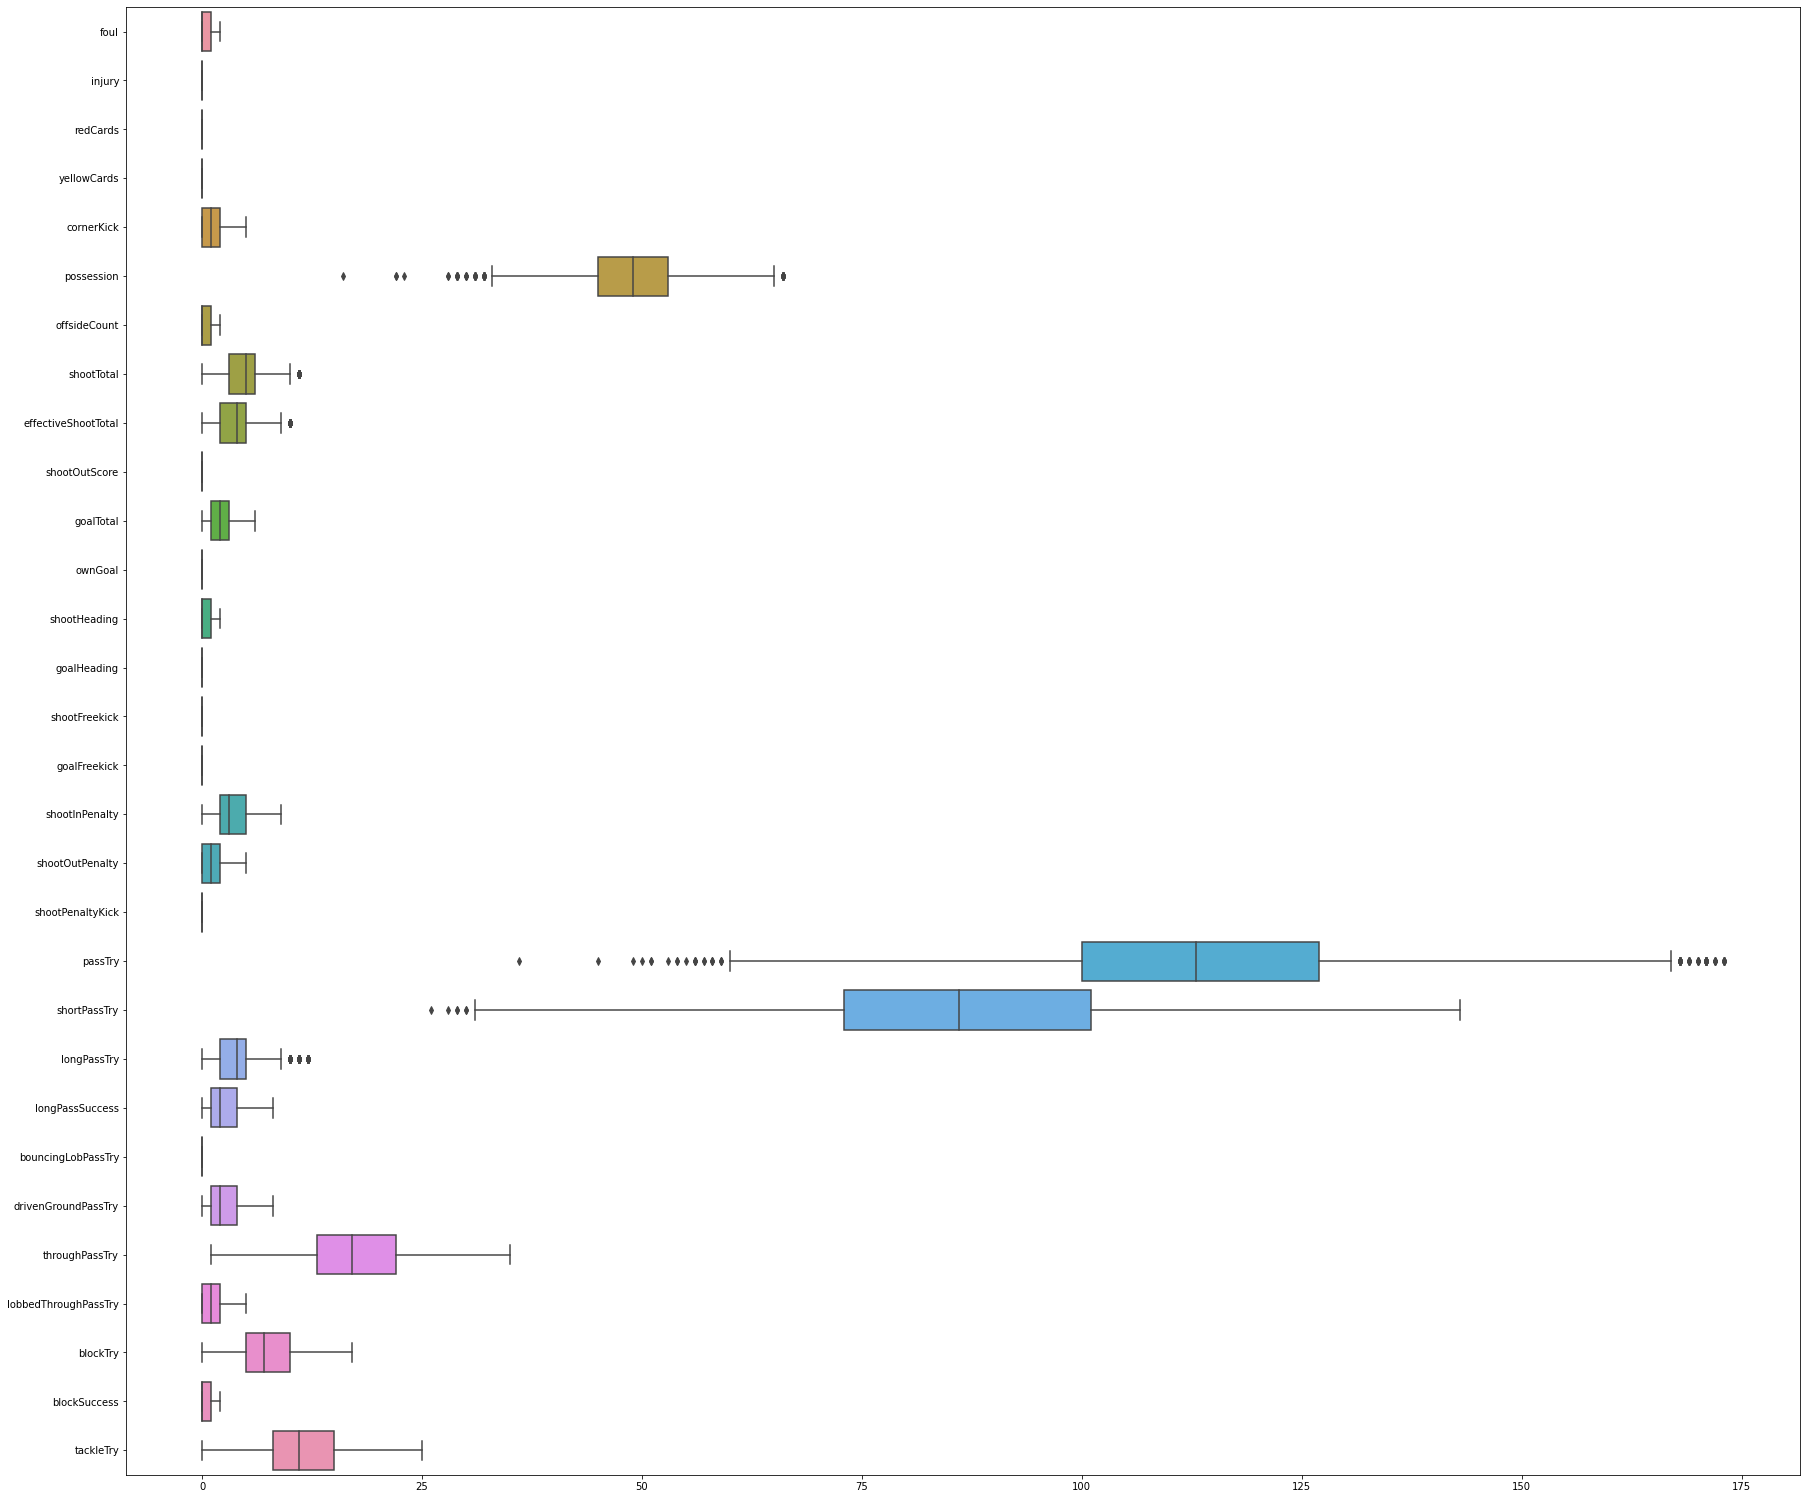

In [11]:
# 이상치 제거 후 확인
pre_df = remove_out(pre_df)
plt.figure(figsize = (30, 27))
sns.boxplot(data = pre_df, orient='h')
plt.show()

In [31]:
pre_df.drop(['dribble', 'throughPassSuccess', 'passSuccess'], axis=1, inplace=True)

pre_df.columns

Index(['foul', 'injury', 'redCards', 'yellowCards', 'cornerKick', 'possession',
       'offsideCount', 'shootTotal', 'effectiveShootTotal', 'shootOutScore',
       'goalTotal', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick',
       'goalFreekick', 'shootInPenalty', 'shootOutPenalty', 'shootPenaltyKick',
       'passTry', 'shortPassTry', 'shortPassSuccess', 'longPassTry',
       'longPassSuccess', 'bouncingLobPassTry', 'bouncingLobPassSuccess',
       'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry',
       'lobbedThroughPassTry', 'lobbedThroughPassSuccess', 'blockTry',
       'blockSuccess', 'tackleTry', 'tackleSuccess'],
      dtype='object')

In [12]:
# 골 수 예측을 하기 때문에 goalTotal	타입 Integer	(실제 골 수) goalInPenalty+goalOutPenalty+goalPenaltyKick
pre_df.columns
# 데이터 분리
X = pre_df.drop(['goalTotal'], axis=1)
y = pre_df['goalTotal']

In [13]:
#%% split data 6:2:2
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=13)
print("X_train Data shape: {}".format(X_train.shape))
print("X_val Data shape: {}".format(X_val.shape))
print("X_test Data shape: {}".format(X_test.shape))
print("y_train Data shape: {}".format(y_train.shape))
print("y_val Data shape: {}".format(y_val.shape))
print("y_test Data shape: {}".format(y_test.shape))

X_train Data shape: (8995, 29)
X_val Data shape: (2999, 29)
X_test Data shape: (2999, 29)
y_train Data shape: (8995,)
y_val Data shape: (2999,)
y_test Data shape: (2999,)


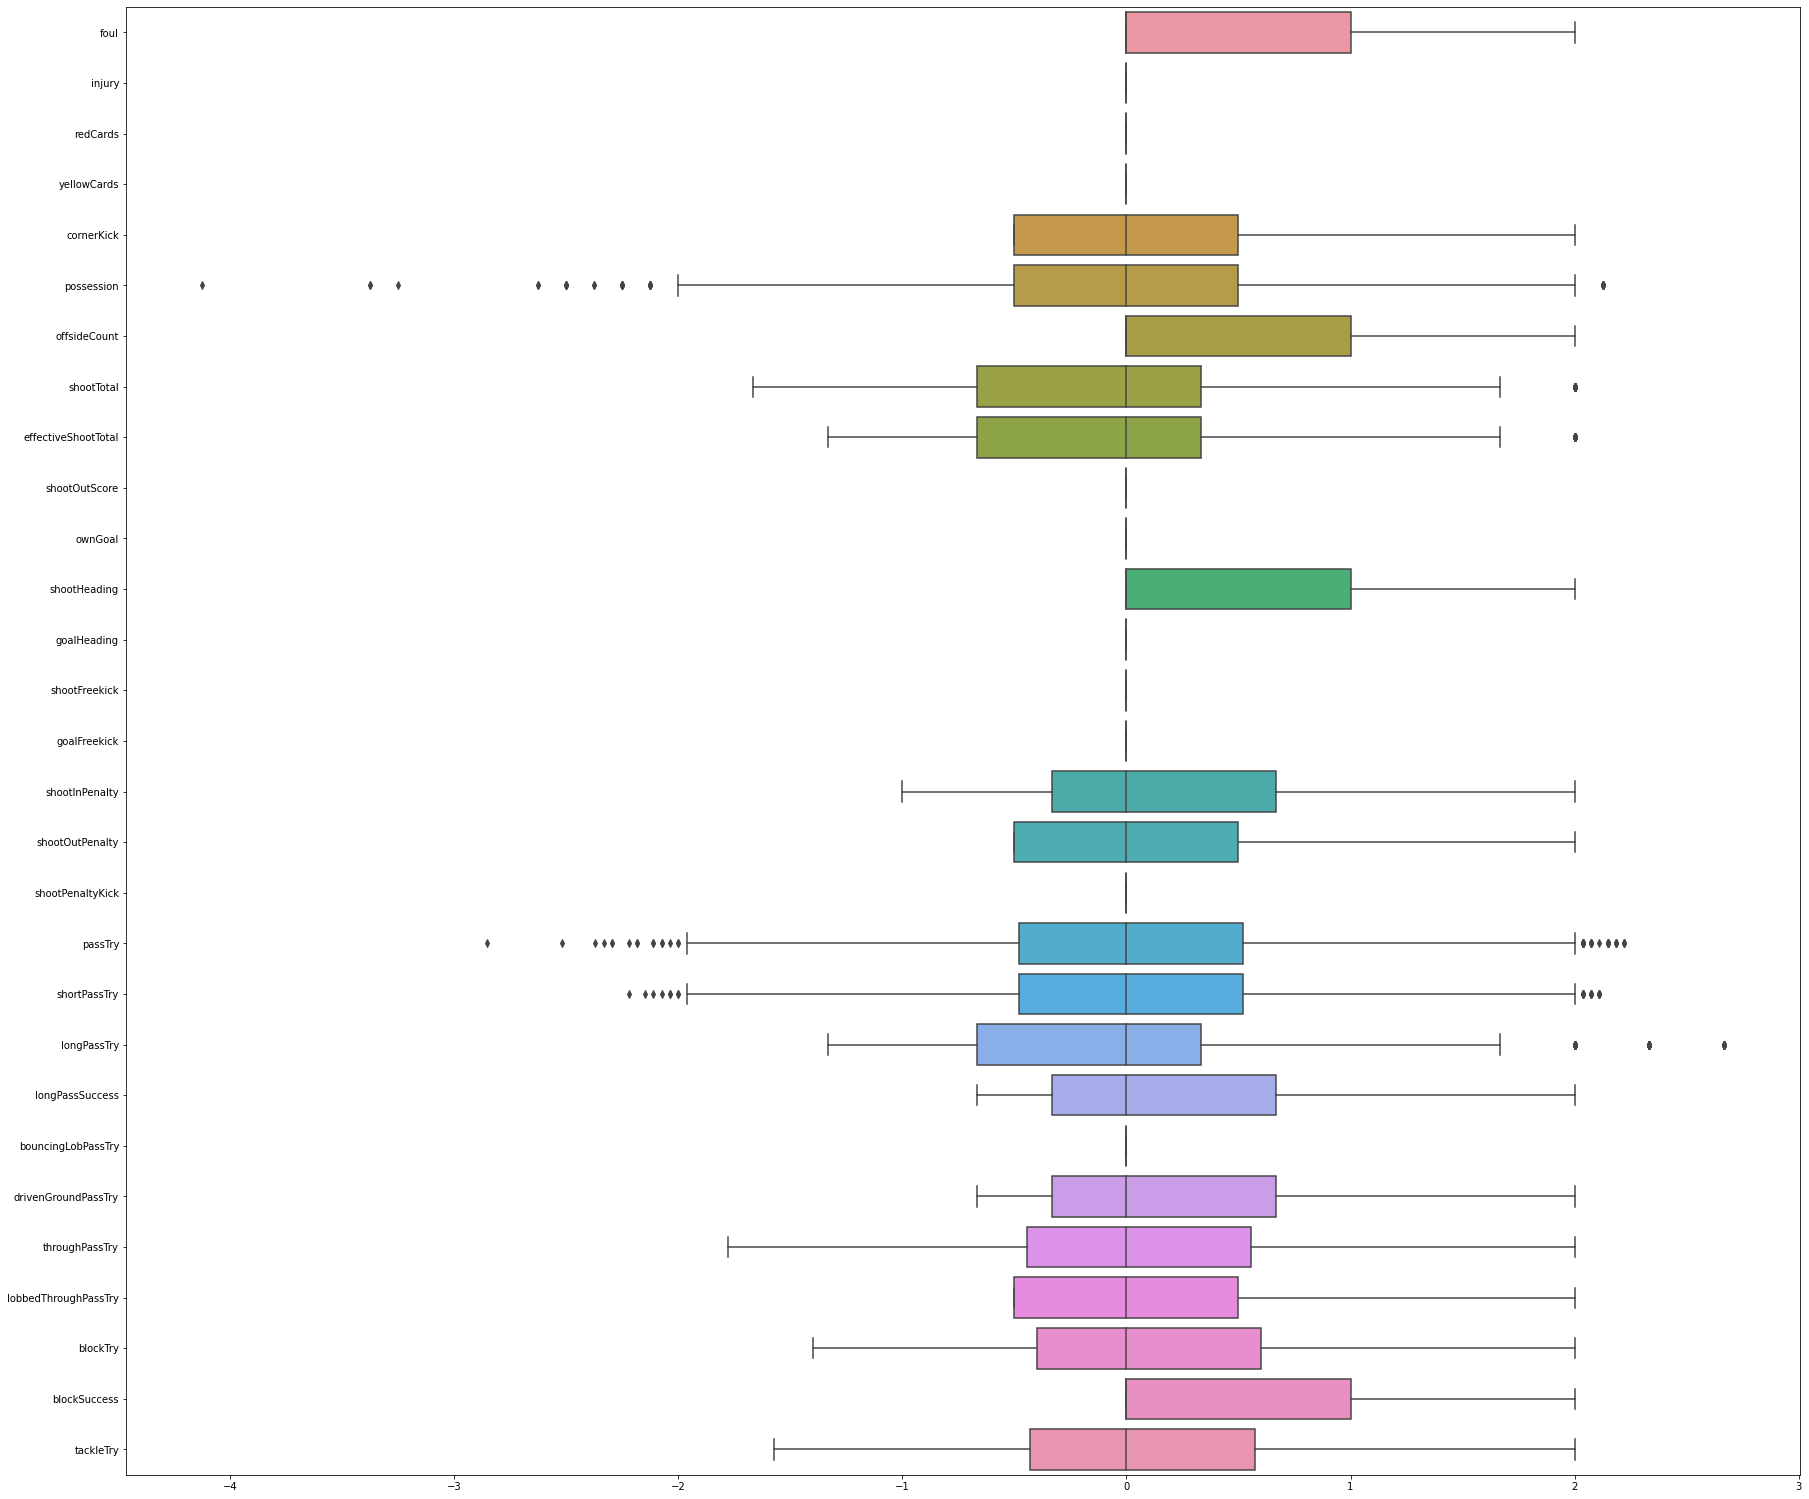

In [14]:
#%% scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
X_test_rs = rs.transform(X_test)

X_train_rs = pd.DataFrame(X_train_rs)
X_train_rs.columns = X.columns

X_val_rs = pd.DataFrame(X_val_rs)
X_val_rs.columns = X.columns

X_test_rs = pd.DataFrame(X_test_rs)
X_test_rs.columns = X.columns

plt.figure(figsize = (30, 27))
sns.boxplot(data=X_train_rs, orient='h')
plt.show()


eigen_value : [1.68916605 1.26788379 0.95670026 0.60097991 0.57092945 0.51633799
 0.46330041 0.43249577 0.4105336  0.37372652 0.359216   0.28969434
 0.28485286 0.23070776 0.21553659]
cum_explained variance ratio : 0.9840773168614361


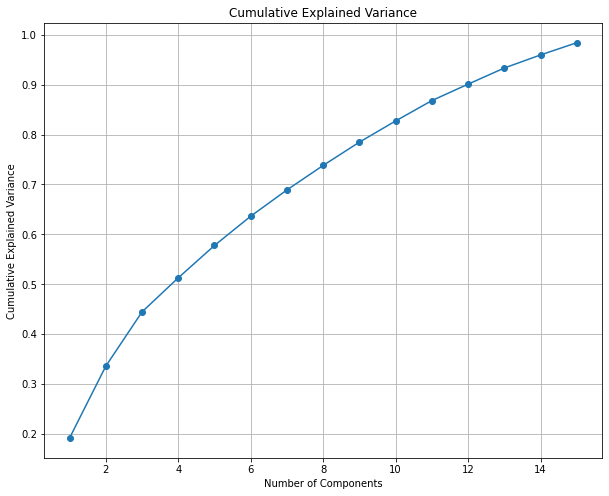

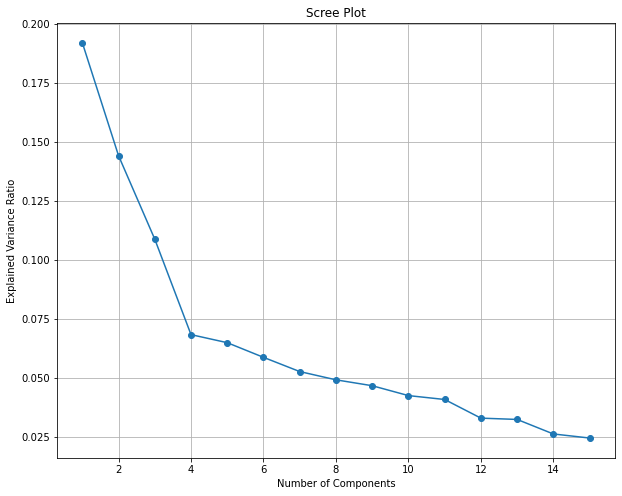

In [16]:
#%% pca
from sklearn.decomposition import PCA

pca = PCA(n_components = 15).fit(X_train_rs)
X_train_rs_pca = pca.transform(X_train_rs)
print('eigen_value :', pca.explained_variance_)
print('cum_explained variance ratio :', sum(pca.explained_variance_ratio_))

plt.figure(figsize = (10, 8))
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

plt.figure(figsize = (10, 8))
plt.plot(range(1, pca.n_components+1), pca.explained_variance_ratio_, 'o-')
plt.grid()
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio');

In [17]:

# pca 최종
rs_pca = PCA(n_components = 8).fit(X_train_rs)
X_train_rs_pca = rs_pca.transform(X_train_rs)
X_val_rs_pca = rs_pca.transform(X_val_rs)
X_test_rs_pca = rs_pca.transform(X_test_rs)
print(f"Original shape: {X_train_rs.shape}")
print(f"Reduced shape: {X_train_rs_pca.shape}")
print('eigen_value :', rs_pca.explained_variance_)
print('cum_explained variance ratio :', sum(rs_pca.explained_variance_ratio_))

X_train_rs_pca = pd.DataFrame(X_train_rs_pca)
X_train_rs_pca = pd.DataFrame(X_train_rs_pca)

Original shape: (8995, 29)
Reduced shape: (8995, 8)
eigen_value : [1.68916605 1.26788379 0.95670026 0.60097991 0.57092945 0.51633799
 0.46330041 0.43249577]
cum_explained variance ratio : 0.7381997307306953


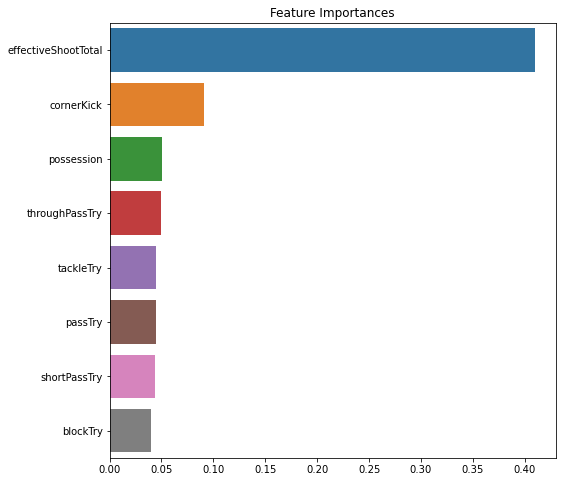

In [18]:

#%% feature_importances_

rf_clf_rs = RandomForestRegressor(random_state=13, n_jobs=-1)
rf_clf_rs.fit(X_train_rs, y_train)

best_cols_values = rf_clf_rs.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train_rs.columns)
topn_cols = best_cols.sort_values(ascending=False)[:8]

# 확인
plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=topn_cols, y=topn_cols.index)
plt.show()




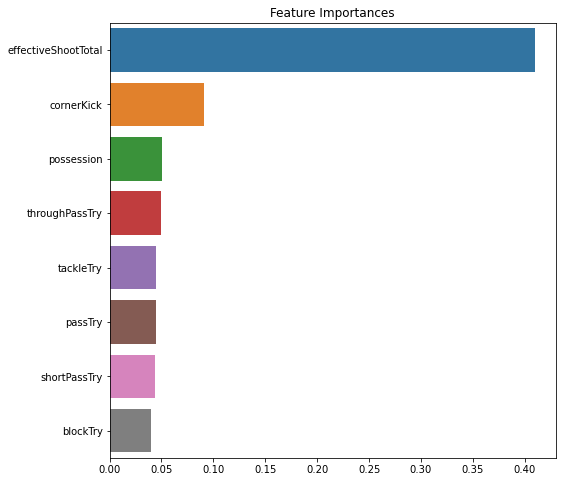

In [19]:
# 1. robust scaling된 데이터로 feature_importance 확인 후 학습 준비
X_train_rs_fi = X_train_rs[topn_cols.index]
X_val_rs_fi = X_val_rs[topn_cols.index]
X_test_rs_fi = X_test_rs[topn_cols.index]

rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1)
rf_clf.fit(X_train, y_train)

best_cols_values = rf_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train_rs.columns)
topn_cols = best_cols.sort_values(ascending=False)[:8]

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=topn_cols, y=topn_cols.index)
plt.show()

X_train_fi = X_train[topn_cols.index]
X_val_fi = X_val[topn_cols.index]
X_test_fi = X_test[topn_cols.index]

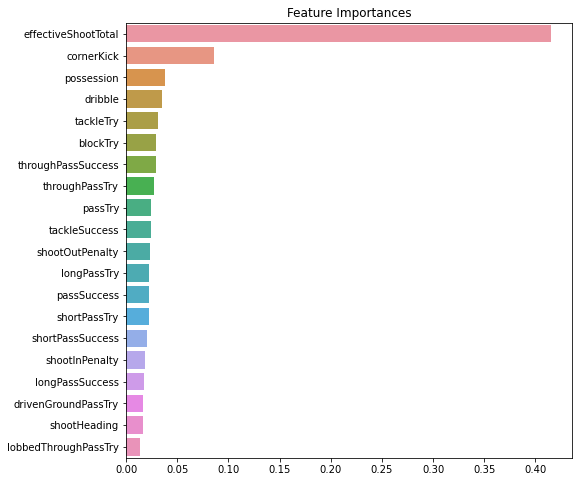

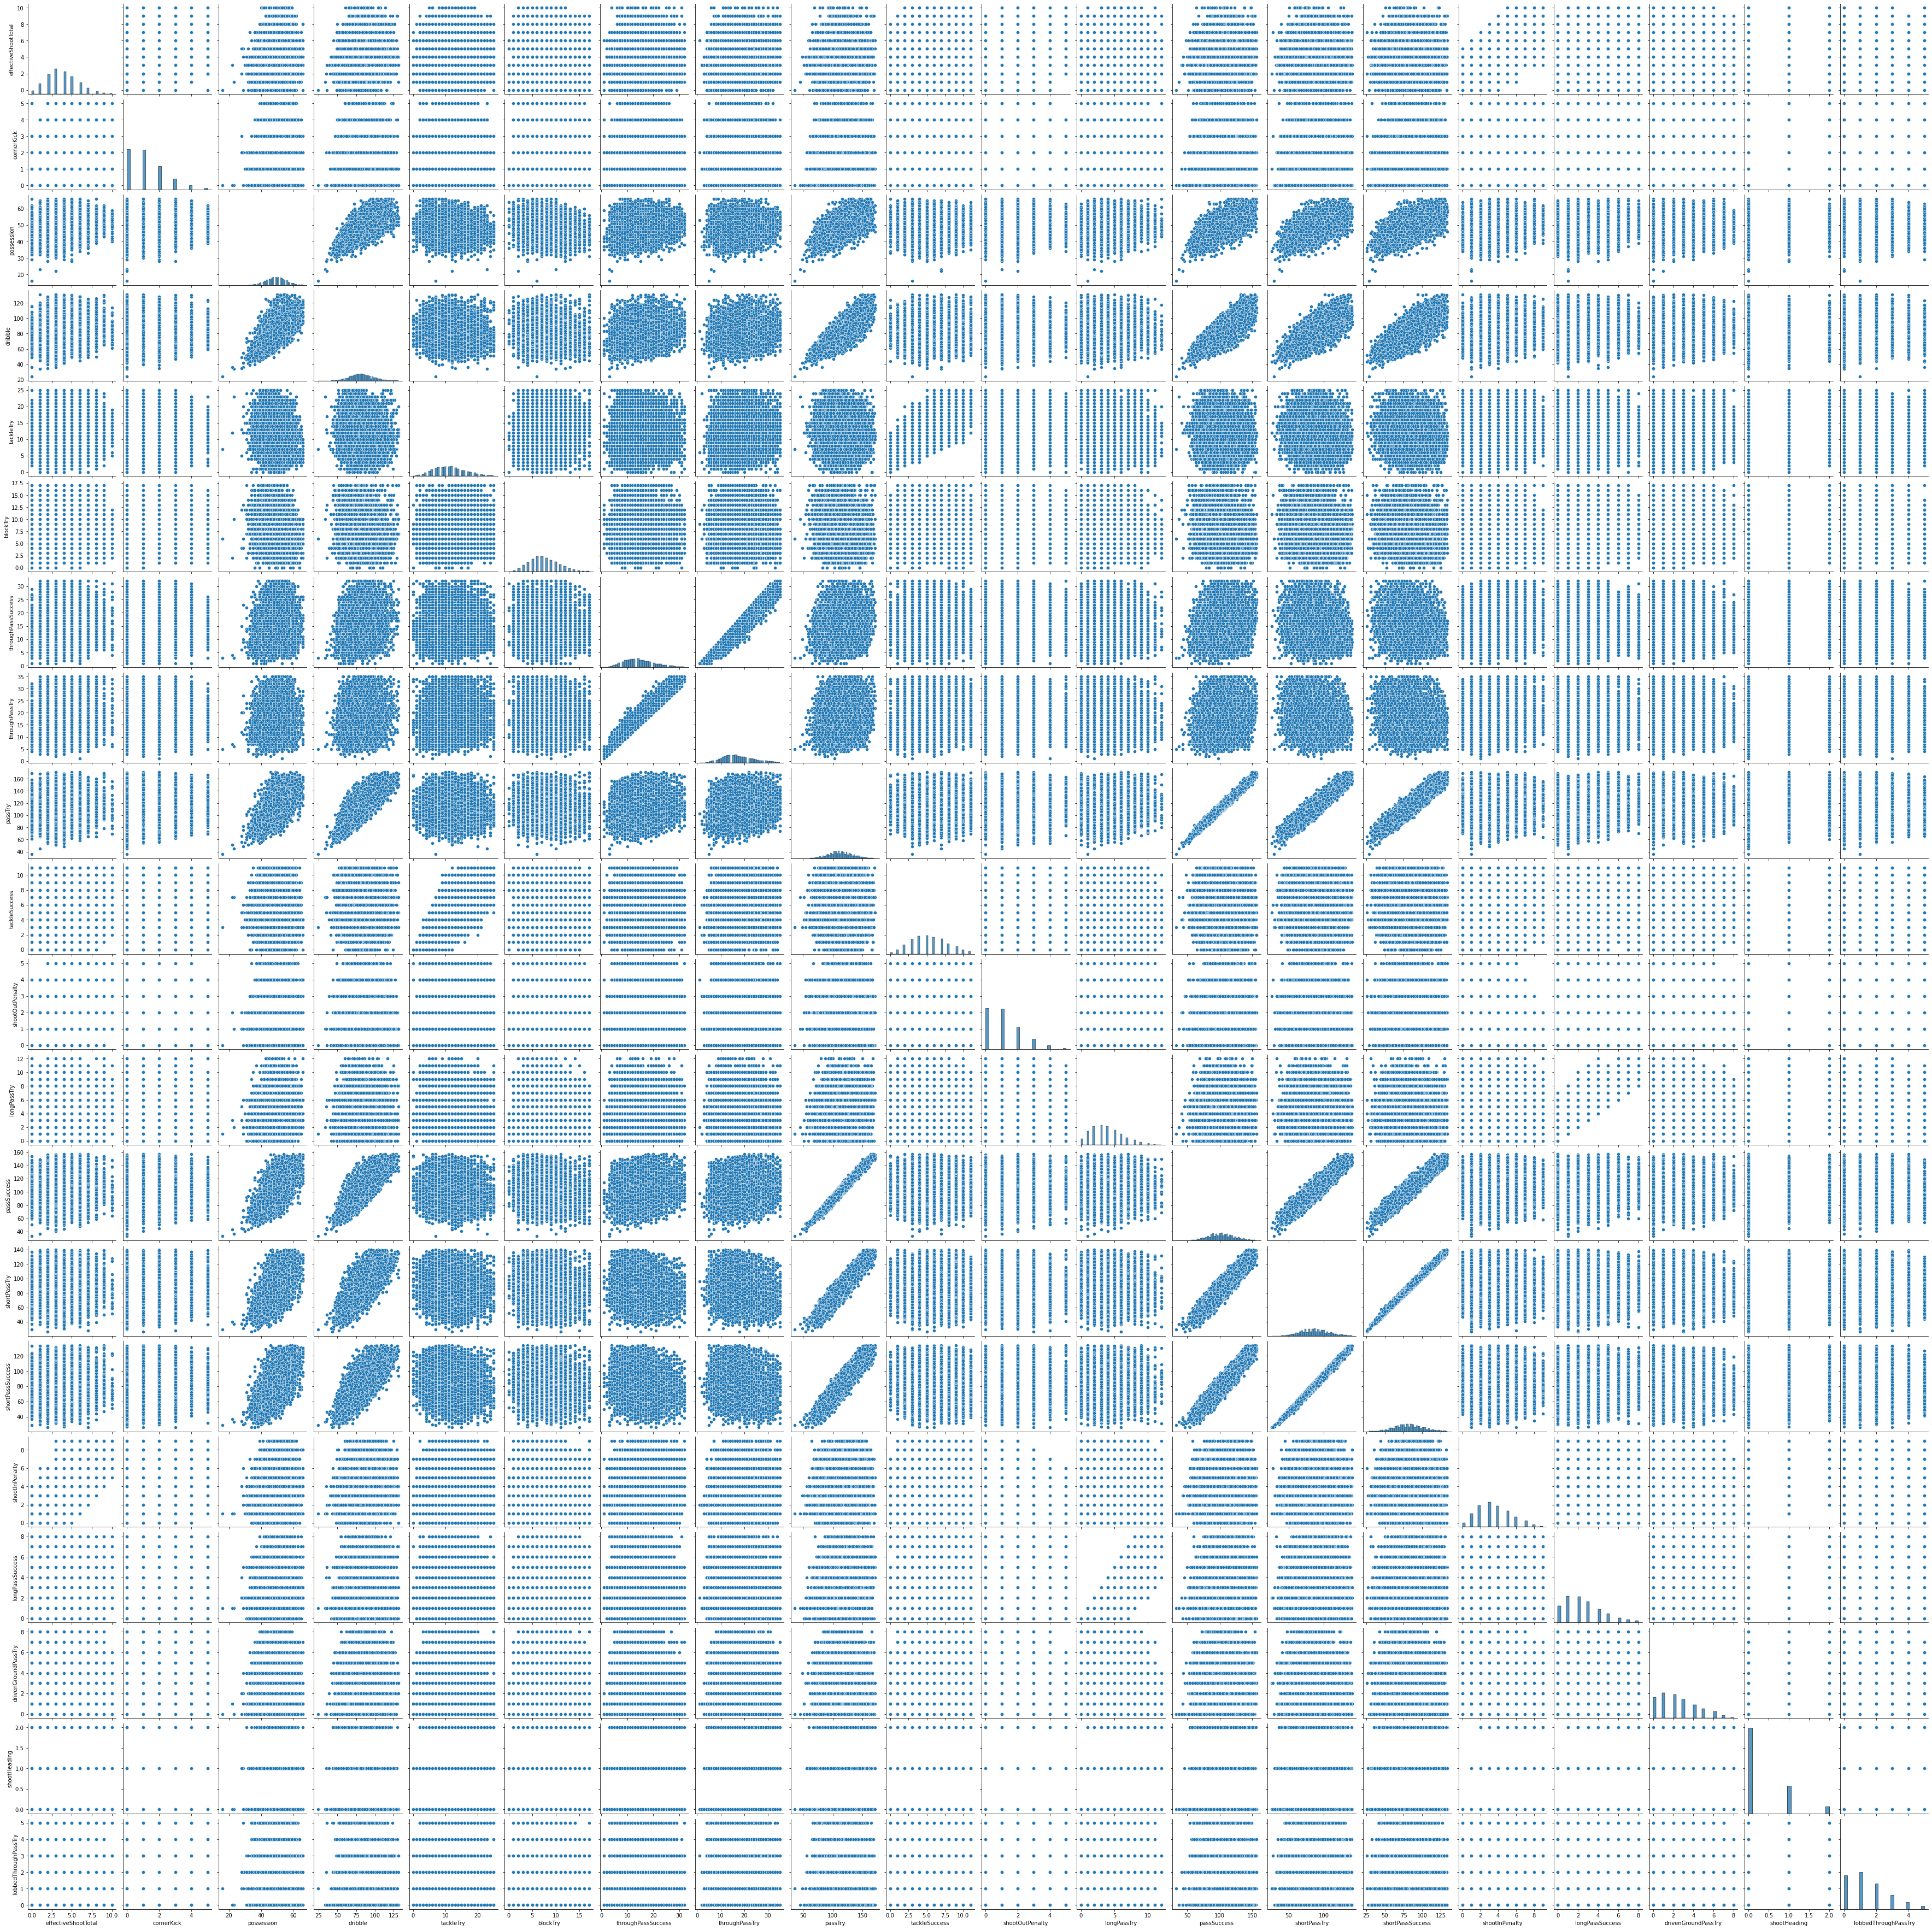

In [24]:
#%%  
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1)
rf_clf.fit(X_train, y_train)

best_cols_values = rf_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

sns.pairplot(data=X_train[top20_cols.index])
plt.show()

In [20]:
#%% 성능평가를 위한 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def print_eval(y_train, y_pred):
    print('R^2:', r2_score(y_train, y_pred))
    print('MAE:', mean_absolute_error(y_train, y_pred))
    print('MSE:', mean_squared_error(y_train, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('==> Confusion matrix')
    print(confusion)
    print('====================')
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))
    

In [21]:
#%% random forest로 전반적인 테스트 validation 데이터를 활용한 검증
# mse기준

# 1. 전처리 x
print("-------\n01. ")
rf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_val = rf.predict(X_val)
print_eval(y_train, rf_pred_train) # 0.12257088739388115
print_eval(y_val, rf_pred_val) # 0.8757745915425276
print(rf.score(X_train, y_train), # 0.9344017957978894 
rf.score(X_val, y_val)) # 0.5332829562210031

# 2. robust scaling
print("-------\n02. ")
rf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train_rs, y_train)
rf_rs_pred_train = rf.predict(X_train_rs)
rf_rs_pred_val = rf.predict(X_val_rs)
print_eval(y_train, rf_rs_pred_train) # 0.12260488146724331
print_eval(y_val, rf_rs_pred_val) # 0.8757876982220085
print(rf.score(X_train_rs, y_train), # 0.93438360265094
rf.score(X_val_rs, y_val)) # 0.5332759714206216


# 3. robust scaling, pca로 feature 특정
print("-------\n03. ")
rf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train_rs_pca, y_train)
rf_pca_pred_train = rf.predict(X_train_rs_pca)
rf_pca_pred_val = rf.predict(X_val_rs_pca)
print_eval(y_train, rf_pca_pred_train) # 0.19094902691013935
print_eval(y_val, rf_pca_pred_val) # 1.3652304300816915
print(rf.score(X_train_rs_pca, y_train), # 0.8978001202426175
rf.score(X_val_rs_pca, y_val)) # 0.271592358591077


# 4. scaling x , feature_importance 
print("-------\n04. ")
rf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train_fi, y_train)
rf_fi_pred_train = rf.predict(X_train_fi)
rf_fi_pred_val = rf.predict(X_val_fi)
print_eval(y_train, rf_fi_pred_train) # 0.13983110350258957
print_eval(y_val, rf_fi_pred_val) # 0.9954383600465856
print(rf.score(X_train_fi, y_train), # 0.9251643724182808
rf.score(X_val_fi, y_val)) # 0.4695118433992672

# 5. robust scaling, feature_importance 
print("-------\n05. ")
rf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train_rs_fi, y_train)
rf_rs_fi_pred_train = rf.predict(X_train_rs_fi)
rf_rs_fi_pred_val = rf.predict(X_val_rs_fi)
print_eval(y_train, rf_rs_fi_pred_train) # 0.13972188851513695
print_eval(y_val, rf_rs_fi_pred_val) # 0.9949562520856694
print(rf.score(X_train_rs_fi, y_train), # 0.9252228227338588
rf.score(X_val_rs_fi, y_val)) # 0.4697687679600777 


-------
01. 
R^2: 0.9288267452423977
MAE: 0.26099499722067815
MSE: 0.11305426347971095
RMSE: 0.3362354286503892
R^2: 0.4954558507883572
MAE: 0.7176158719573191
MSE: 0.8299503501167056
RMSE: 0.9110161085934242
0.9288267452423977 0.4954558507883572
-------
02. 
R^2: 0.9287504014300784
MAE: 0.2611573096164536
MSE: 0.1131755308504725
RMSE: 0.336415711360918
R^2: 0.49536108486220387
MAE: 0.7176392130710236
MSE: 0.830106235411804
RMSE: 0.9111016603057004
0.9287504014300784 0.49536108486220387
-------
03. 
R^2: 0.8948756622619795
MAE: 0.32340411339633124
MSE: 0.166983435241801
RMSE: 0.4086360669860175
R^2: 0.2822975861677398
MAE: 0.8670856952317438
MSE: 1.1805852284094698
RMSE: 1.086547388938683
0.8948756622619795 0.2822975861677398
-------
04. 
R^2: 0.9240068317031475
MAE: 0.2693229571984436
MSE: 0.12071039466370205
RMSE: 0.34743401483404307
R^2: 0.45125929315855884
MAE: 0.7475458486162055
MSE: 0.9026515171723908
RMSE: 0.9500797425334311
0.9240068317031475 0.45125929315855884
-------
05. 
R^

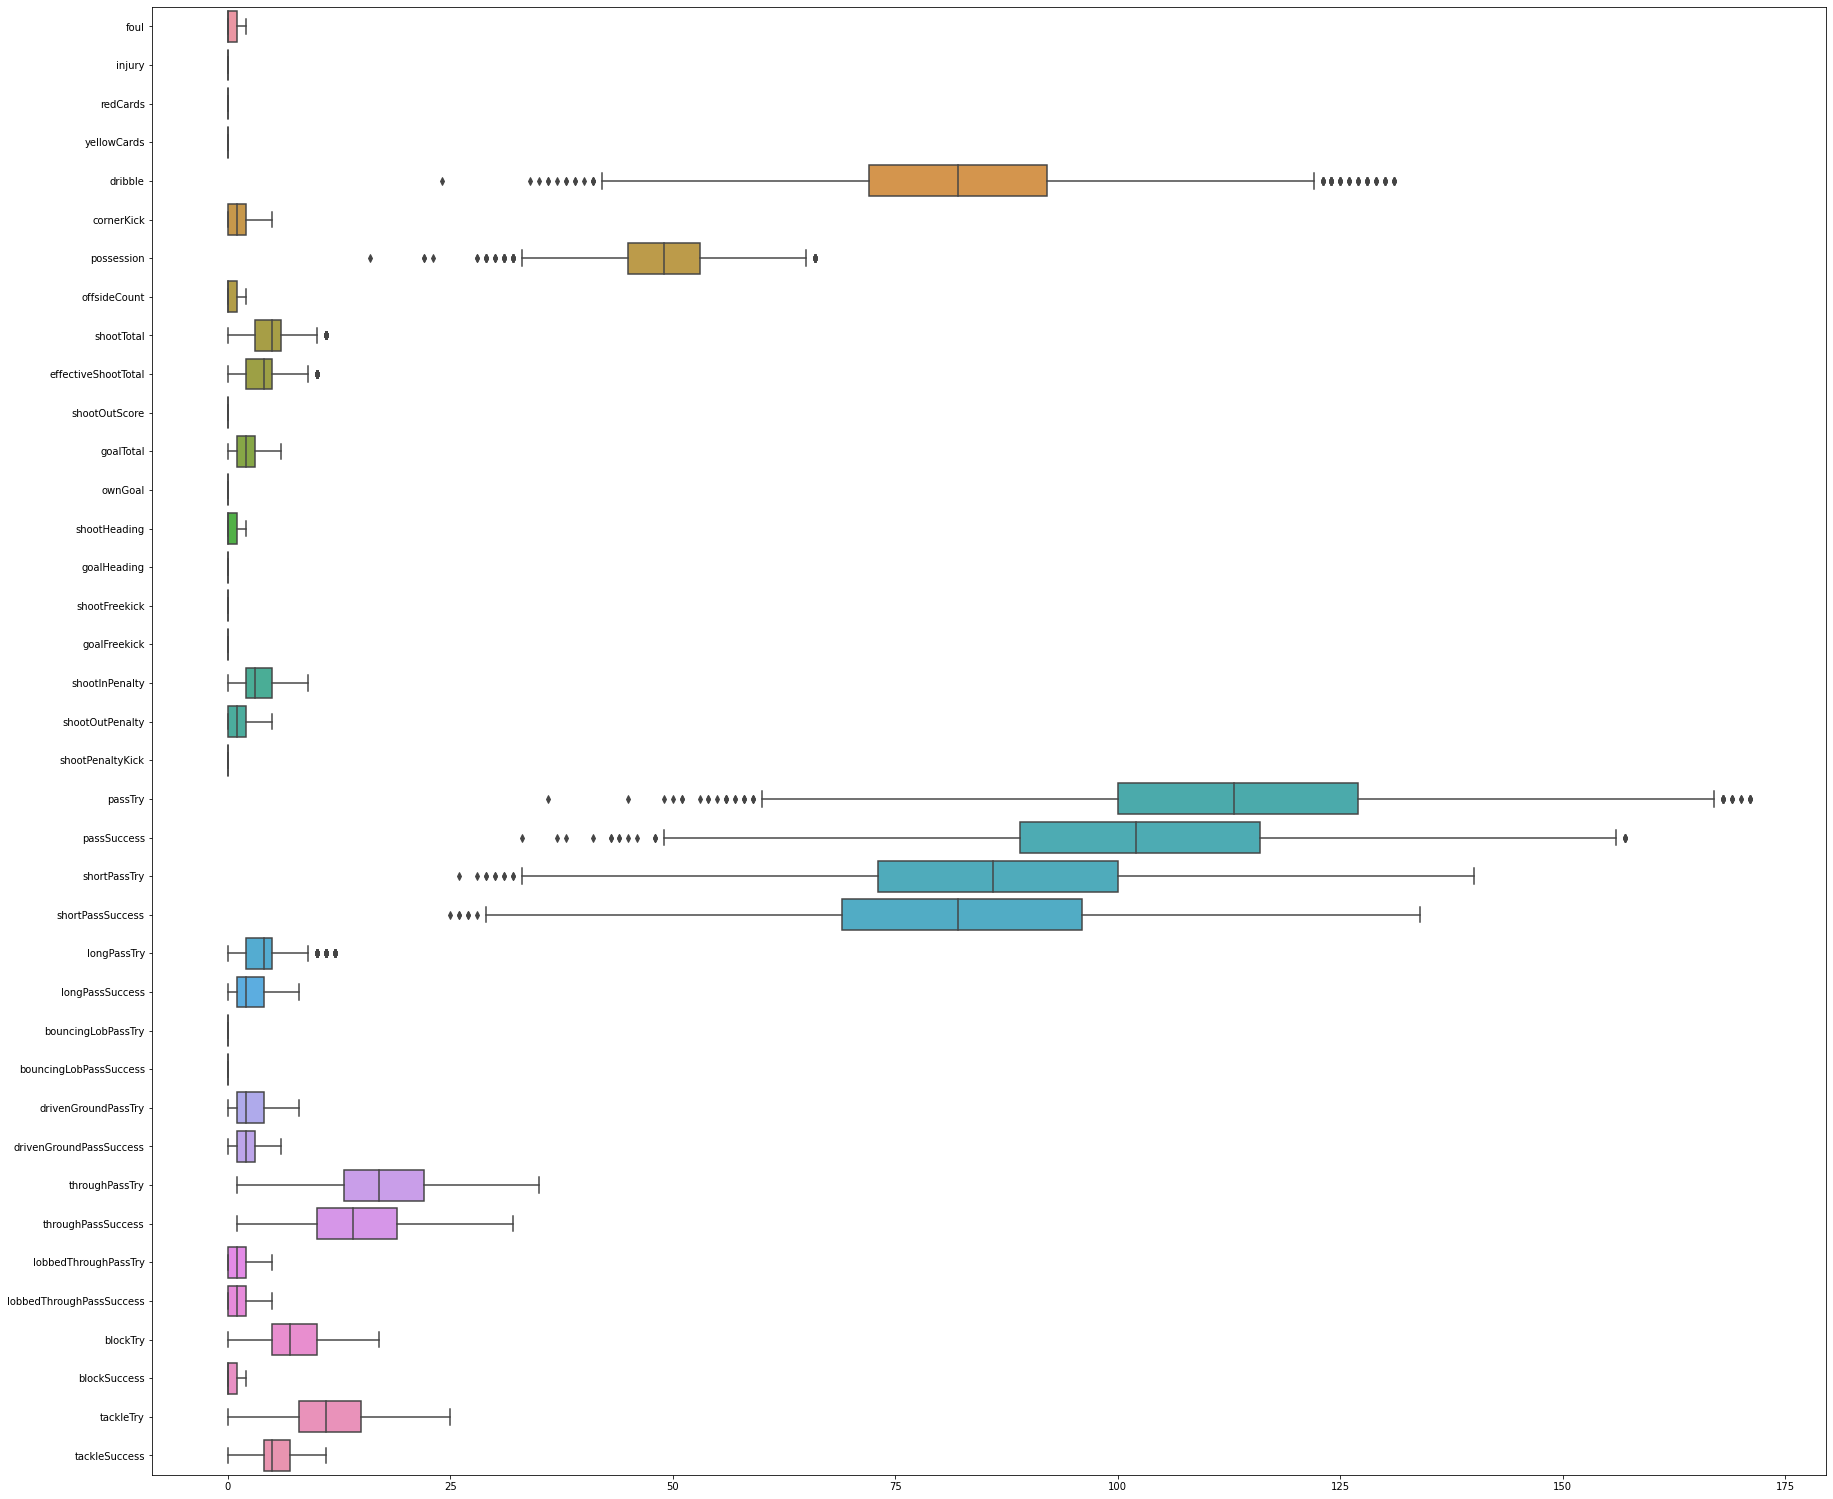

In [28]:
#%% 6. 이상치 제거 후 standard scaling
pre_df = raw_df.drop(['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
                      'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
                      'goalOutPenalty', 'goalPenaltyKick', 'averageRating'], axis=1)
# 이상치 제거
remove_out(pre_df)

plt.figure(figsize = (30, 27))
sns.boxplot(data = pre_df, orient='h')
plt.show()

In [29]:

# 독립변수간 영향을 미치는 독립변수들 제거
pre_df.drop(['dribble', 'throughPassSuccess', 'passSuccess'], axis=1, inplace=True)

pre_df.columns

X = pre_df.drop(['goalTotal'], axis=1)
y = pre_df['goalTotal']
# 학습준비
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=13)
print("X_train Data shape: {}".format(X_train.shape))
print("X_val Data shape: {}".format(X_val.shape))
print("X_test Data shape: {}".format(X_test.shape))




X_train Data shape: (8510, 34)
X_val Data shape: (2837, 34)
X_test Data shape: (2837, 34)


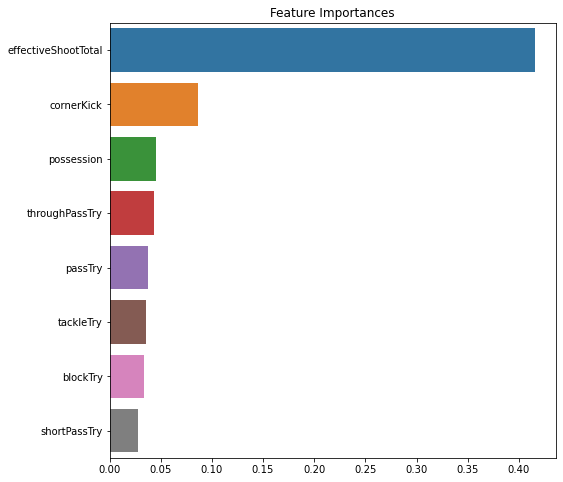

In [30]:
# feature_importances 확인
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train, y_train)
best_cols_values = rf_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
topn_cols = best_cols.sort_values(ascending=False)[:8]

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=topn_cols, y=topn_cols.index)
plt.show()


In [22]:
X_train_fi = X_train[topn_cols.index]
X_val_fi = X_val[topn_cols.index]
X_test_fi = X_test[topn_cols.index]

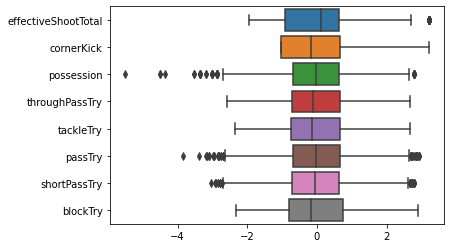

In [23]:
# 이상치 제거했으니 standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_fi)
X_val_sc = sc.transform(X_val_fi)
X_test_sc = sc.transform(X_test_fi)

X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train_fi.columns

X_val_sc = pd.DataFrame(X_val_sc)
X_val_sc.columns = X_train_fi.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train_fi.columns

# 이상치가 다시 생김
plt.figure()
sns.boxplot(data=X_train_sc, orient='h')
plt.show()



c:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

R^2: 0.9242985843364963
MAE: 0.27041480611045826
MSE: 0.12075618096357227
RMSE: 0.34749990066699626
R^2: 0.4278127941746891
MAE: 0.7391082129009519
MSE: 0.8793774762072613
RMSE: 0.9377512869664649
0.9242985843364963 0.4278127941746891


' 뭔가 문젠지 과적합이 해결이 안됨 minmax로 다시'

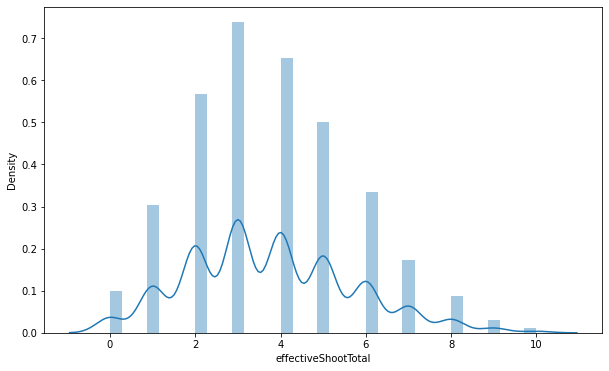

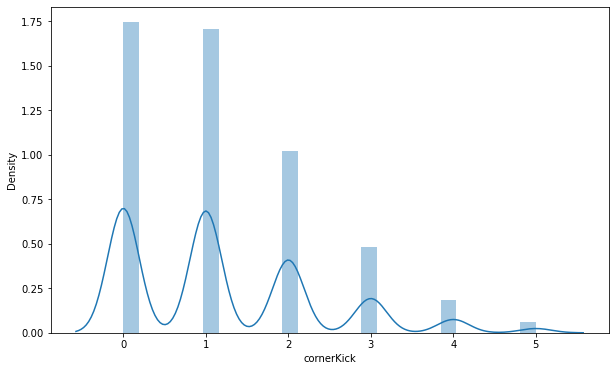

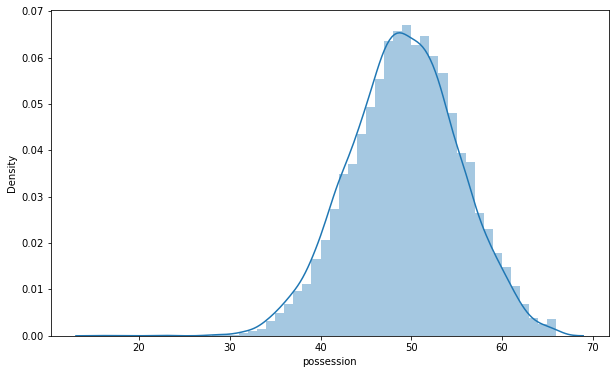

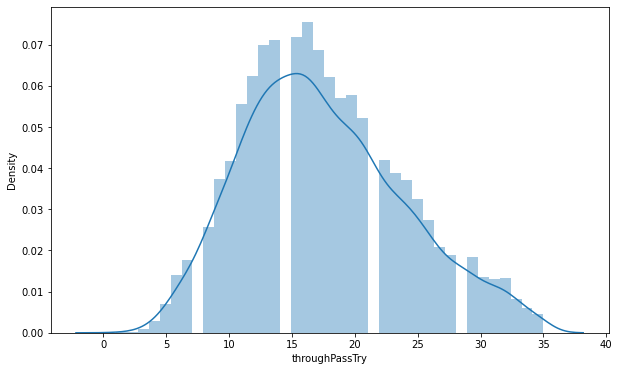

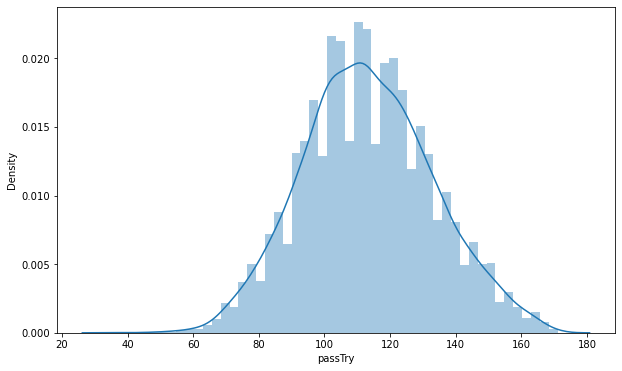

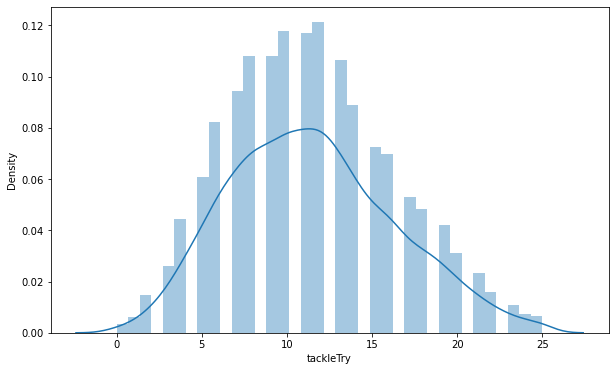

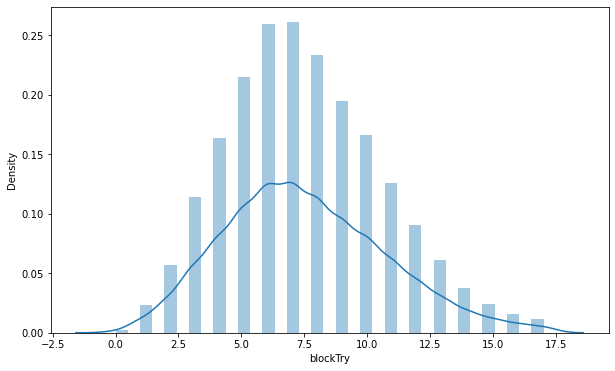

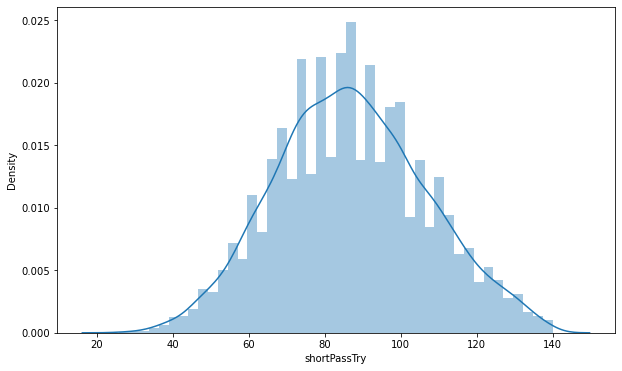

In [33]:
for i in X_train_fi.columns:
    f, ax = plt.subplots(figsize = (10, 6))
    sns.distplot(X_train_fi[i])

rf = RandomForestRegressor(max_depth= 50, random_state=13, n_jobs=-1).fit(X_train_sc, y_train)
rf_fi_pred_train = rf.predict(X_train_sc)
rf_fi_pred_val = rf.predict(X_val_sc)
print_eval(y_train, rf_fi_pred_train) # 0.13983110350258957
print_eval(y_val, rf_fi_pred_val) # 0.9954383600465856
print(rf.score(X_train_sc, y_train), # 0.9251643724182808
rf.score(X_val_sc, y_val)) # 0.4695118433992672

''' 뭔가 문젠지 과적합이 해결이 안됨 minmax로 다시'''

X_train Data shape: (24972, 29)
X_val Data shape: (8324, 29)
X_test Data shape: (8324, 29)


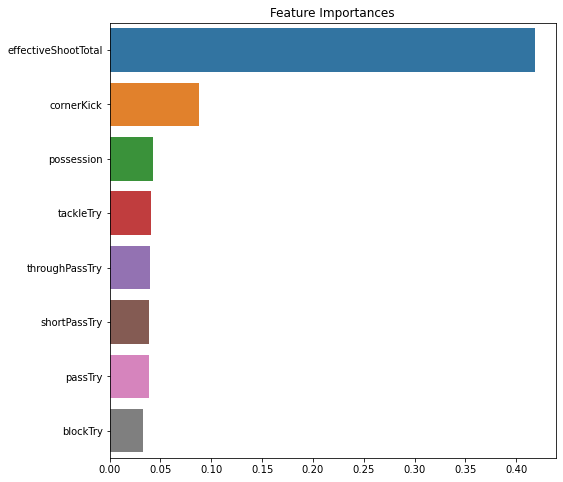

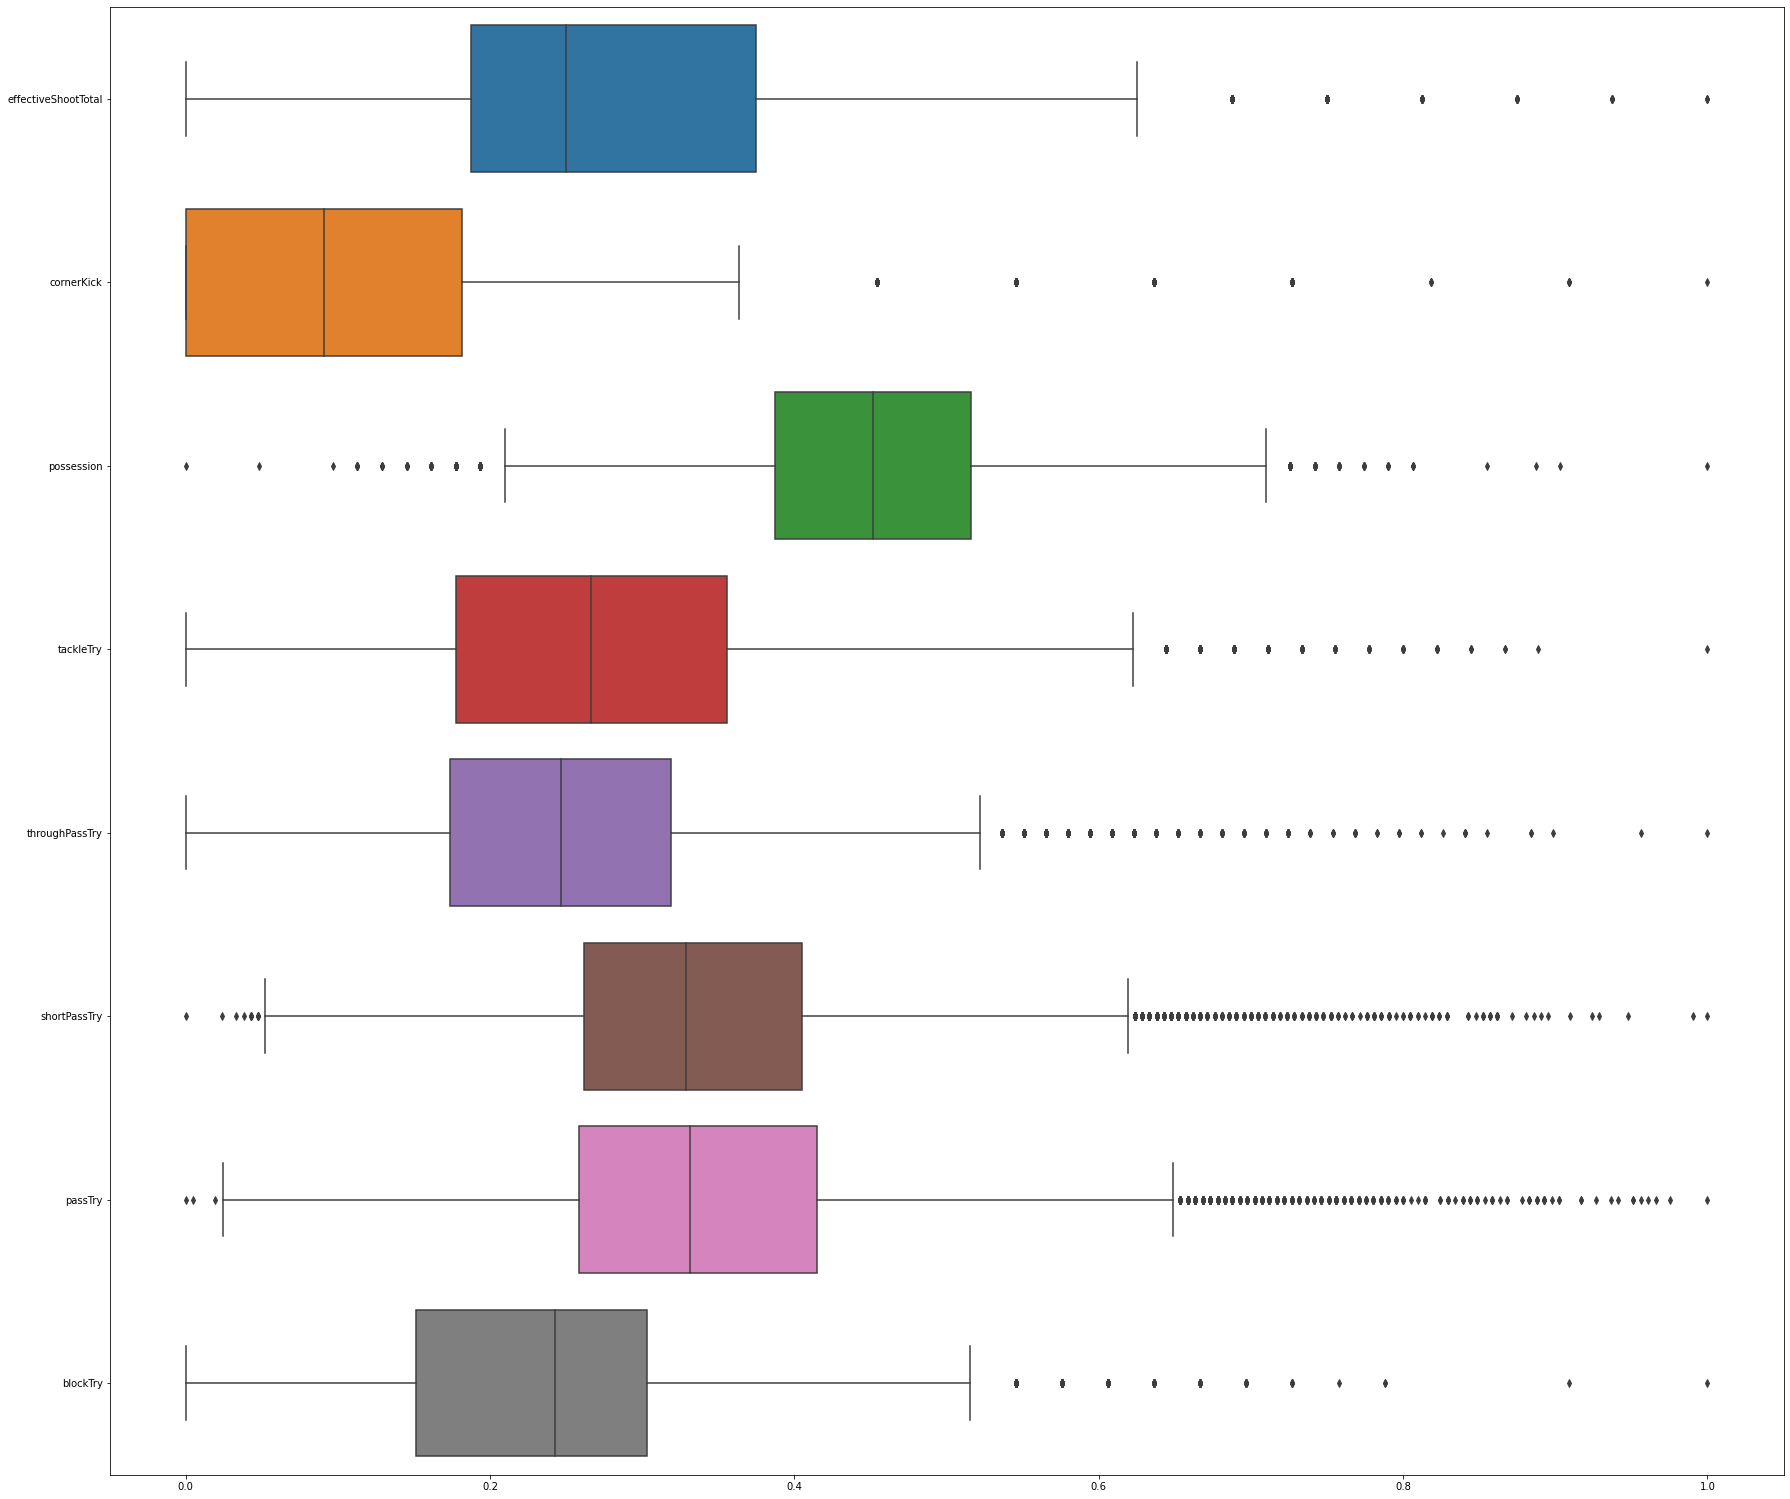

R^2: 0.9270138798383085
MAE: 0.2922343565746016
MSE: 0.13637528076366348
RMSE: 0.36929023919359616
R^2: 0.4653446240528606
MAE: 0.7946886341273656
MSE: 1.0032579691001078
RMSE: 1.0016276599116598


In [34]:
# 7. minmax scaling, 이상치 제거 안함
#%% 다시 
pre_df = raw_df.drop(['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
                      'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
                      'goalOutPenalty', 'goalPenaltyKick', 'averageRating'], axis=1)

pre_df.drop(['dribble', 'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'drivenGroundPassSuccess',
             'shortPassSuccess', 'lobbedThroughPassSuccess', 'bouncingLobPassSuccess'], axis=1, inplace=True)

pre_df.columns

X = pre_df.drop(['goalTotal'], axis=1)
y = pre_df['goalTotal']

X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=13)
print("X_train Data shape: {}".format(X_train.shape))
print("X_val Data shape: {}".format(X_val.shape))
print("X_test Data shape: {}".format(X_test.shape))

# 
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train, y_train)
best_cols_values = rf_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
topn_cols = best_cols.sort_values(ascending=False)[:8]

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=topn_cols, y=topn_cols.index)
plt.show()
'''
R^2: 0.9270138798383085
MAE: 0.2922343565746016
MSE: 0.13637528076366348
RMSE: 0.36929023919359616
'''


X_train_fi = X_train[topn_cols.index]
X_val_fi = X_val[topn_cols.index]
X_test_fi = X_test[topn_cols.index]

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train_fi)
X_val_mm = mm.transform(X_val_fi)
X_test_mm = mm.transform(X_test_fi)

X_train_mm = pd.DataFrame(X_train_mm)
X_train_mm.columns = X_train_fi.columns

X_val_mm = pd.DataFrame(X_val_mm)
X_val_mm.columns = X_train_fi.columns

X_test_mm = pd.DataFrame(X_test_mm)
X_test_mm.columns = X_train_fi.columns


plt.figure(figsize = (30, 27))
sns.boxplot(data=X_train_mm, orient='h')
plt.show()

rf = RandomForestRegressor(n_estimators= 500, max_depth= 50, max_features=1, 
                            random_state=13, n_jobs=-1).fit(X_train_mm, y_train)
rf_fi_pred_train = rf.predict(X_train_mm)
rf_fi_pred_val = rf.predict(X_val_mm)
print_eval(y_train, rf_fi_pred_train) # 0.9270138798383085
print_eval(y_val, rf_fi_pred_val) # 0.4133478244145603

'''
R^2: 0.4653446240528606
MAE: 0.7946886341273656
MSE: 1.0032579691001078
RMSE: 1.0016276599116598
'''

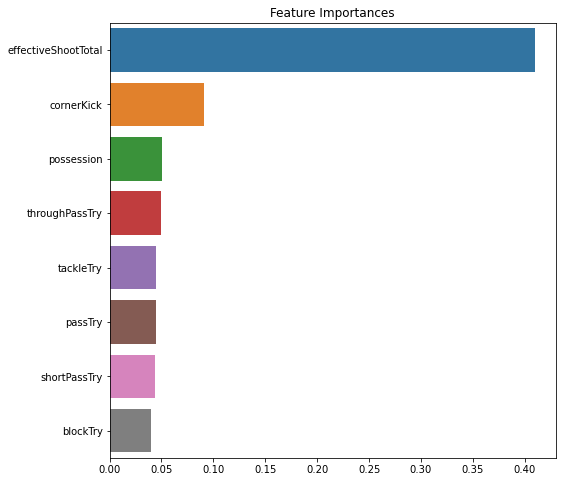

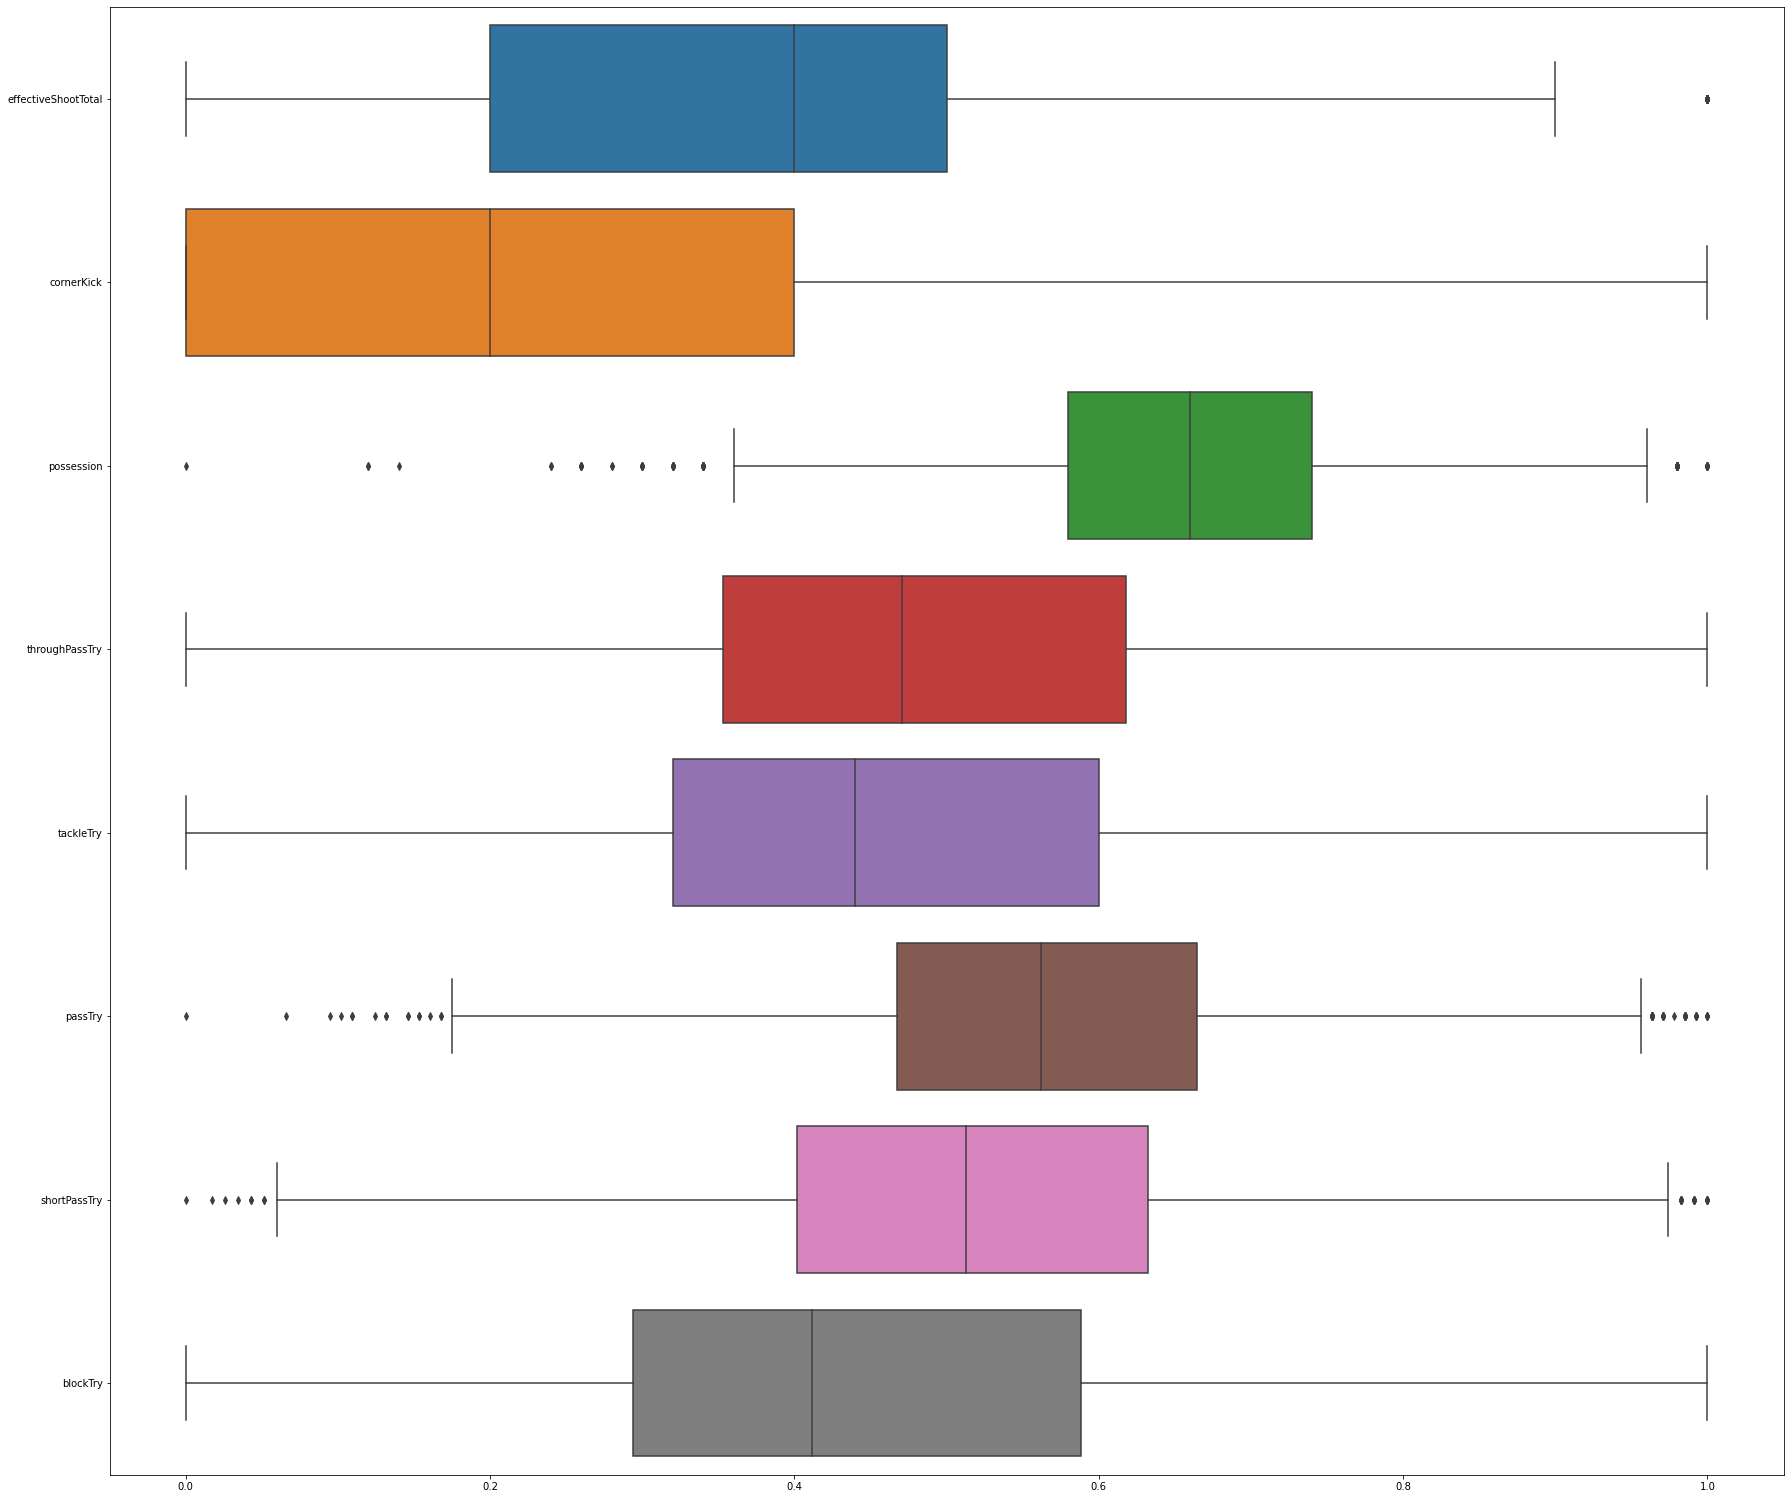

R^2: 0.9240505338464489
MAE: 0.2760222345747637
MSE: 0.12064097654252363
RMSE: 0.3473340993086104
R^2: 0.44811934511071194
MAE: 0.7659226408802934
MSE: 0.907816577525842
RMSE: 0.9527940897832239


'\nR^2: 0.4653446240528606\nMAE: 0.7946886341273656\nMSE: 1.0032579691001078\nRMSE: 1.0016276599116598\n'

In [24]:
# 
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1).fit(X_train, y_train)
best_cols_values = rf_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
topn_cols = best_cols.sort_values(ascending=False)[:8]

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
sns.barplot(x=topn_cols, y=topn_cols.index)
plt.show()
'''
R^2: 0.9270138798383085
MAE: 0.2922343565746016
MSE: 0.13637528076366348
RMSE: 0.36929023919359616
'''


X_train_fi = X_train[topn_cols.index]
X_val_fi = X_val[topn_cols.index]
X_test_fi = X_test[topn_cols.index]

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train_fi)
X_val_mm = mm.transform(X_val_fi)
X_test_mm = mm.transform(X_test_fi)

X_train_mm = pd.DataFrame(X_train_mm)
X_train_mm.columns = X_train_fi.columns

X_val_mm = pd.DataFrame(X_val_mm)
X_val_mm.columns = X_train_fi.columns

X_test_mm = pd.DataFrame(X_test_mm)
X_test_mm.columns = X_train_fi.columns


plt.figure(figsize = (30, 27))
sns.boxplot(data=X_train_mm, orient='h')
plt.show()

rf = RandomForestRegressor(n_estimators= 500, max_depth= 50, max_features=1, 
                            random_state=13, n_jobs=-1).fit(X_train_mm, y_train)
rf_fi_pred_train = rf.predict(X_train_mm)
rf_fi_pred_val = rf.predict(X_val_mm)
print_eval(y_train, rf_fi_pred_train) # 0.9270138798383085
print_eval(y_val, rf_fi_pred_val) # 0.4133478244145603

'''
R^2: 0.4653446240528606
MAE: 0.7946886341273656
MSE: 1.0032579691001078
RMSE: 1.0016276599116598
'''

In [35]:
### 모델 선정을 위한 random search


In [25]:
#%% random forest
''' random search '''
clf = RandomForestRegressor(random_state=13, n_jobs=-1)
h_para = {'n_estimators': range(100, 1500, 15),
          'max_depth': range(1, 150, 15),
          'max_features': range(1, 8)}
rf_rs = RandomizedSearchCV(clf, h_para, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                           verbose=1, random_state=13, n_jobs = -1)
rf_rs.fit(X_train_mm, y_train)
print(rf_rs.best_params_, f'{rf_rs.best_score_:.4f}')
# {'n_estimators': 1240, 'max_features': 3, 'max_depth': 16} -0.9434

''' The score of random search best_parameters '''
rf_rs_best = rf_rs.best_estimator_
rf_rs_best.fit(X_train_mm, y_train)
print(("best_param"))
rf_rs_best_pred_train = rf_rs_best.predict(X_train_mm)
rf_rs_best_pred_val = rf_rs_best.predict(X_val_mm)
print_eval(y_train, rf_rs_best_pred_train) # 0.8173557708659263
print_eval(y_val, rf_rs_best_pred_val) # 0.4964133926649701

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1240, 'max_features': 3, 'max_depth': 16} -0.8353
best_param
R^2: 0.8699960344548399
MAE: 0.3612153854895665
MSE: 0.2065031678571633
RMSE: 0.4544261962708172
R^2: 0.48343722497926045
MAE: 0.7329859434015557
MSE: 0.8497203994052909
RMSE: 0.9218027985449442


In [40]:
#%% logistic regression
from sklearn.linear_model import LogisticRegression

''' gridsearch '''
clf = LogisticRegression(max_iter=10000, random_state=13, n_jobs=-1)
h_para = [{'C': np.logspace(-3, 3, 25), 'penalty': [ 'l1', 'l2'], 'solver': ['liblinear']},
          {'C': np.logspace(-3, 3, 25), 'penalty': ['l2'], 'solver': ['lbfgs']}]
lr_gs = GridSearchCV(clf, h_para, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
lr_gs.fit(X_train_mm, y_train)
print(lr_gs.best_params_, f'{lr_gs.best_score_:.4f}')
# {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} -1.0290

''' The score of grid search best_parameters '''
lr_gs_best = lr_gs.best_estimator_
lr_gs_best.fit(X_train_mm, y_train)
print(("best_param"))
lr_gs_best_pred_train = lr_gs_best.predict(X_train_mm)
lr_gs_best_pred_val = lr_gs_best.predict(X_val_mm)
print_eval(y_train, lr_gs_best_pred_train) # 0.4494692439207324
print_eval(y_val, lr_gs_best_pred_val) # 0.4559410298603491


c:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'} -1.0291
R^2: 0.4495764011062041
MAE: 0.7300576645843344
MSE: 1.028471888515137
RMSE: 1.0141360305773268
R^2: 0.45485265583206325
MAE: 0.7278952426717924
MSE: 1.022945699183085
RMSE: 1.0114077808594737


In [41]:
#%% SVM
from sklearn.svm import SVR

''' random search '''
clf = SVR()
h_para = [{'kernel': [ 'linear' ], 'C': np.logspace(-3, 3, 6), 'epsilon': np.logspace(-3, 3, 6)},
          {'kernel': ['rbf'], 'C': np.logspace(-3, 3, 6), 'epsilon': np.logspace(-3, 3, 6), 'gamma': np.logspace(-3, 3, 6)}]
svm_rs = RandomizedSearchCV(clf, h_para, scoring = 'neg_mean_squared_error', cv = 5, verbose=1, n_jobs = -1)
svm_rs.fit(X_train_mm, y_train)
print(svm_rs.best_params_, f'{svm_rs.best_score_:.4f}')
# {'kernel': 'rbf', 'gamma': 0.015848931924611134, 'epsilon': 0.015848931924611134, 'C': 63.0957344480193} -0.9202

''' The score of random search best_parameters '''
svm_rs_best = svm_rs.best_estimator_
svm_rs_best.fit(X_train_mm, y_train)
print("best_param")
svm_rs_best_pred_train = svm_rs_best.predict(X_train_mm)
svm_rs_best_pred_val = svm_rs_best.predict(X_val_mm)
print_eval(y_train, svm_rs_best_pred_train) # 0.5089214480857307
print_eval(y_val, svm_rs_best_pred_val) # 0.507081536303746

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 0.25118864315095796, 'epsilon': 0.25118864315095796, 'C': 1000.0} -0.9065
best_param
R^2: 0.5212677290397366
MAE: 0.7465450559129128
MSE: 0.8945159397183542
RMSE: 0.9457885280116027
R^2: 0.5127321803697429
MAE: 0.7539548414023839
MSE: 0.914337244368084
RMSE: 0.9562098328129051


In [38]:
#%% LightGBM
from lightgbm import LGBMRegressor

clf = LGBMRegressor(random_state=13, n_jobs=-1)
h_para = {'n_estimators': range(1, 1500, 100), 'max_depth': range(1, 1500, 15),
          'min_child_samples': range(1, 5000, 100), 'learning_rate': np.logspace(-3, 3, 20)}
lgbm_rs = RandomizedSearchCV(clf, h_para, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
lgbm_rs.fit(X_train_mm, y_train)
print(lgbm_rs.best_params_, f'{lgbm_rs.best_score_:.4f}')
# {'n_estimators': 1201, 'min_child_samples': 1101, 'max_depth': 361, 'learning_rate': 0.07847599703514611} -0.9524

''' The score of random search best_parameters '''
lgbm_rs_best = lgbm_rs.best_estimator_
lgbm_rs_best.fit(X_train_mm, y_train)
print("best_param")
lgbm_rs_best_pred_train = lgbm_rs_best.predict(X_train_mm)
lgbm_rs_best_pred_val = lgbm_rs_best.predict(X_val_mm)
print_eval(y_train, lgbm_rs_best_pred_train) # 0.5660083590987288
print_eval(y_val, lgbm_rs_best_pred_val) # 0.4934274150599618

{'n_estimators': 1001, 'min_child_samples': 2501, 'max_depth': 751, 'learning_rate': 0.018329807108324356} -0.9820
R^2: 0.48198828181997033
MAE: 0.7753194283221113
MSE: 0.9679099717749965
RMSE: 0.9838241569381169
R^2: 0.4766295914191594
MAE: 0.7838423422247021
MSE: 0.9820822100025441
RMSE: 0.9910006104955457


In [42]:
#%% 최종 Model Evaluation, ( r^2  / RMSE  )

''' RandomForestRegressor '''
print('----------\nRandomForestRegressor')
bp =  {'n_estimators': 1240, 'max_features': 3, 'max_depth': 16} # -0.9434
rf_rs_fin_best = RandomForestRegressor(**bp, random_state=13, n_jobs=-1)
rf_rs_fin_best.fit(X_train_mm, y_train)
print("best_param")
rf_rs_fin_best_pred_train = rf_rs_fin_best.predict(X_train_mm)
rf_rs_fin_best_pred_val = rf_rs_fin_best.predict(X_val_mm)
print_eval(y_train, rf_rs_fin_best_pred_train) # 0.8173557708659263 / 0.5841853575658337
print_eval(y_val, rf_rs_fin_best_pred_val) # 0.4964133926649701 / 0.9720898889784317

''' LogisticRegression '''
print('----------\nLogisticRegression')
bp = {'C': 6.158482110660261, 'penalty': 'l2', 'solver': 'lbfgs'} # -0.8503
lr_gs_fin_best = LogisticRegression(**bp, n_jobs=-1)
lr_gs_fin_best.fit(X_train_mm, y_train)
print(("best_param"))
lr_gs_fin_best_pred_train = lr_gs_fin_best.predict(X_train_mm)
lr_gs_fin_best_pred_val = lr_gs_fin_best.predict(X_val_mm)
print_eval(y_train, lr_gs_fin_best_pred_train) # 0.4481404948208837 / 1.0154579722867405
print_eval(y_val, lr_gs_fin_best_pred_val) # 0.4539563478087689 / 1.012238896156851

''' SVR '''
print('----------\nSVR')
bp = {'kernel': 'rbf', 'gamma': 0.015848931924611134, 'epsilon': 0.015848931924611134, 'C': 63.0957344480193} # -0.9202
svm_rs_fin_best = SVR(**bp,)
svm_rs_fin_best.fit(X_train_mm, y_train)
print(("best_param"))
svm_rs_fin_best_pred_train = svm_rs_fin_best.predict(X_train_mm)
svm_rs_fin_best_pred_val = svm_rs_fin_best.predict(X_val_mm)
print_eval(y_train, svm_rs_fin_best_pred_train) # 0.5089214480857307 / 0.9579066168842726
print_eval(y_val, svm_rs_fin_best_pred_val) # 0.507081536303746 / 0.9617382370097467

''' LGBMRegressor '''
print('----------\nLGBMRegressor')
bp = {'n_estimators': 1201, 'min_child_samples': 1101, 'max_depth': 361, 'learning_rate': 0.07847599703514611} # -0.9524
lgbm_rs_fin_best = LGBMRegressor(**bp, random_state=13, n_jobs=-1)
lgbm_rs_fin_best.fit(X_train_mm, y_train)
print(("best_param"))
lgbm_rs_fin_best_pred_train = lgbm_rs_fin_best.predict(X_train_mm)
lgbm_rs_fin_best_pred_val = lgbm_rs_fin_best.predict(X_val_mm)
print_eval(y_train, lgbm_rs_fin_best_pred_train) # 0.5660083590987288 / 0.900509652368427
print_eval(y_val, lgbm_rs_fin_best_pred_val) # 0.4934274150599618 / 0.9749675951794595

''' 과적합이 되더라도 차라리 train MSE가 가장 낮은 RandomForestRegressor 선택 '''
print('----------\n최종 선정\nRandomForestRegressor')
print("test")
rf_rs_fin_best_pred_test = rf_rs_fin_best.predict(X_test_mm)
print_eval(y_test, rf_rs_fin_best_pred_test) # 0.5018588883775862 / 0.9482042238571879
'''
R^2: 0.5018588883775862
MAE: 0.7718652184783593
MSE: 0.9482042238571879
RMSE: 0.9737577850046633
'''


----------
RandomForestRegressor
best_param
R^2: 0.8173557708659263
MAE: 0.46544086022998105
MSE: 0.341272531994321
RMSE: 0.5841853575658337
R^2: 0.4964133926649701
MAE: 0.7685104127828891
MSE: 0.9449587522540999
RMSE: 0.9720898889784318
----------
LogisticRegression
best_param
R^2: 0.4478618861386573
MAE: 0.7331811629024507
MSE: 1.0316754765337177
RMSE: 1.0157142691395635
R^2: 0.4541484138137606
MAE: 0.7282556463238827
MSE: 1.0242671792407496
RMSE: 1.0120608574788126
----------
SVR
best_param
R^2: 0.5089214480857335
MAE: 0.7568437291212063
MSE: 0.9175850866706675
RMSE: 0.9579066168842699
R^2: 0.5070815363037411
MAE: 0.7590991678415928
MSE: 0.9249404365266249
RMSE: 0.9617382370097515
----------
LGBMRegressor
best_param
R^2: 0.5660083590987288
MAE: 0.7163970072596267
MSE: 0.8109176340087051
RMSE: 0.900509652368427
R^2: 0.4934274150599618
MAE: 0.7762620830238571
MSE: 0.9505618116500185
RMSE: 0.9749675951794595
----------
최종 선정
RandomForestRegressor
test
R^2: 0.5018588883775862
MAE: 0.771

In [27]:
# 내꺼내꺼
''' RandomForestRegressor '''
print('----------\nRandomForestRegressor')
bp =  {'n_estimators': 1240, 'max_features': 3, 'max_depth': 16} # -0.9434
rf_rs_fin_best = RandomForestRegressor(**bp, random_state=13, n_jobs=-1)
rf_rs_fin_best.fit(X_train_mm, y_train)
print("best_param")
rf_rs_fin_best_pred_train = rf_rs_fin_best.predict(X_train_mm)
rf_rs_fin_best_pred_val = rf_rs_fin_best.predict(X_val_mm)
print_eval(y_train, rf_rs_fin_best_pred_train) # 0.8173557708659263 / 0.5841853575658337
print_eval(y_val, rf_rs_fin_best_pred_val) # 0.4964133926649701 / 0.9720898889784317

print('----------\n최종 선정\nRandomForestRegressor')
print("test")
rf_rs_fin_best_pred_test = rf_rs_fin_best.predict(X_test_mm)
print_eval(y_test, rf_rs_fin_best_pred_test) # 0.5018588883775862 / 0.9482042238571879
'''
R^2: 0.5018588883775862
MAE: 0.7718652184783593
MSE: 0.9482042238571879
RMSE: 0.9737577850046633
'''


----------
RandomForestRegressor
best_param
R^2: 0.8699960344548399
MAE: 0.3612153854895665
MSE: 0.2065031678571633
RMSE: 0.4544261962708172
R^2: 0.48343722497926045
MAE: 0.7329859434015557
MSE: 0.8497203994052909
RMSE: 0.9218027985449442
----------
최종 선정
RandomForestRegressor
test
R^2: 0.4932293158282913
MAE: 0.7301608889293563
MSE: 0.8531564093393654
RMSE: 0.9236646628183658


'\nR^2: 0.5018588883775862\nMAE: 0.7718652184783593\nMSE: 0.9482042238571879\nRMSE: 0.9737577850046633\n'

In [50]:
wl_df = raw_df[['matchResult','goalTotal', 'possession']]
wl_df



matchResult  goalTotal  possession
0                1          4          55
1                0          2          45
2                0          3          49
3                1          4          51
4                1          6          56
...            ...        ...         ...
45997            0          1          51
45998            0          2          49
45999            1          3          51
46000            0          0          36
46001            1          2          64

[41620 rows x 3 columns]

In [63]:
# 학습
X_wl = wl_df.drop('matchResult', axis=1)
y_wl = raw_df['matchResult']


X_wl_train, X_wl_test, y_wl_train, y_wl_test= train_test_split(X_wl, y_wl, test_size=0.2, random_state=13)

print(X_wl_train.shape, X_wl_test.shape, y_wl_train.shape, y_wl_test.shape)
from sklearn.linear_model import LogisticRegression

model_wl = LogisticRegression().fit(X_wl_train, y_wl_train)
model_wl.predict(X_wl_train)
print(model_wl.predict(X_wl_test))
result_wl = model_wl.predict(X_wl_test)
# result_wl = model_wl.predict(y_wl_test)
print_clf_eval(y_wl_test, result_wl)

(33296, 2) (8324, 2) (33296,) (8324,)
[0 0 0 ... 1 0 1]
==> Confusion matrix
[[3308  817]
 [ 957 3242]]
Accuracy: 0.7869, Precision: 0.7987
Recall: 0.7721, F1: 0.7852, AUC: 0.7870


In [89]:
#%% final pro
raw_fin_pro_df = pd.read_csv('zero_ml_pro_raw.csv', encoding='cp949', index_col=0)

print(len(raw_fin_pro_df[raw_fin_pro_df['matchResult'] == '무']))
print(len(raw_fin_pro_df[raw_fin_pro_df['matchEndType'] != 0]))

raw_fin_pro_df.drop(index=raw_fin_pro_df[raw_fin_pro_df['matchEndType'] != 0].index, inplace=True)
raw_fin_pro_df.drop(index=raw_fin_pro_df[raw_fin_pro_df['matchResult'] == '무'].index, inplace=True)
raw_fin_pro_df.duplicated().sum()
raw_fin_pro_df = raw_fin_pro_df.drop_duplicates()
raw_fin_pro_df.reset_index(drop=True, inplace=True)
raw_fin_pro_df.columns
drop_col = ['matchId', 'nickname', 'seasonId', 'matchEndType', 'controller',
            'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
            'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 
            'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'shortPassSuccess']

pred_goal_list = []
pred_win_list = []
pred_model_wl_list = []
for i in range(int(len(raw_fin_pro_df)/2)):
    level1 = raw_fin_pro_df.iloc[2*i:2*i+2]
    for j in range(2):
        level2 = pd.DataFrame(level1.iloc[j]).T
        level2 = level2.drop(drop_col, axis=1)

        X_pro = level2.drop(['goalTotal'], axis=1)
        y_pro = level2['goalTotal']
        
        X_pro_fi = X_pro[topn_cols.index]

        X_pro_fi_mm = mm.transform(X_pro_fi)
        X_pro_fi_mm = pd.DataFrame(X_pro_fi_mm)
        X_pro_fi_mm.columns = X_pro_fi.columns
        
        rf_rs_best_pred_fin = rf_rs_fin_best.predict(X_pro_fi_mm)
        pred_goal_list.append(rf_rs_best_pred_fin[0])
        pred_model_wl_list.append(model_wl.predict(raw_fin_pro_df[['goalTotal', 'possession']])[i])

    if pred_goal_list[-1] < pred_goal_list[-2]:
        pred_win_list.append(1)
        pred_win_list.append(0)
    else:
        pred_win_list.append(0)
        pred_win_list.append(1)
    

pro_real_win = raw_fin_pro_df['matchResult']
pro_real_goal = raw_fin_pro_df['goalTotal']
raw_fin_pro_df['matchResult'].replace('승', 1, inplace=True)
raw_fin_pro_df['matchResult'].replace('패', 0, inplace=True)
pro_pred_goal_list = pd.Series(pred_goal_list)
pro_pred_win_list = pd.Series(pred_win_list)
pred_model_wl_list = pd.Series(pred_model_wl_list)
pro_result_df = pd.concat([pro_real_win, pro_real_goal, pro_pred_win_list, pro_pred_goal_list, pred_model_wl_list], axis=1)
pro_result_df.rename(columns={0: 'pred_matchResult', 1: 'pred_goalTotal', 2: 'pred_model'}, inplace=True)

pro_real_win_rate = len(pro_result_df[pro_result_df['matchResult'] == 1]) / len(pro_result_df['matchResult'])
pro_pred_win_rate = len(pro_result_df[pro_result_df['pred_matchResult'] == 1]) / len(pro_result_df['pred_matchResult'])

print_clf_eval(pro_real_win, pro_pred_win_list)
print('진짜 승률', pro_real_win_rate)
print('예측 승률', pro_real_win_rate)

8
20
==> Confusion matrix
[[140  41]
 [ 41 140]]
Accuracy: 0.7735, Precision: 0.7735
Recall: 0.7735, F1: 0.7735, AUC: 0.7735
진짜 승률 0.5
예측 승률 0.5


In [52]:
#%% final pro SaddlerJungmin
raw_fin_pro_df = pd.read_csv('zero_ml_pro_raw.csv', encoding='cp949', index_col=0)

print(len(raw_fin_pro_df[raw_fin_pro_df['matchResult'] == '무']))
print(len(raw_fin_pro_df[raw_fin_pro_df['matchEndType'] != 0]))

raw_fin_pro_df.drop(index=raw_fin_pro_df[raw_fin_pro_df['matchEndType'] != 0].index, inplace=True)
raw_fin_pro_df.drop(index=raw_fin_pro_df[raw_fin_pro_df['matchResult'] == '무'].index, inplace=True)
raw_fin_pro_df.duplicated().sum()
raw_fin_pro_df = raw_fin_pro_df.drop_duplicates()
raw_fin_pro_df.reset_index(drop=True, inplace=True)
raw_fin_pro_df.columns
drop_col = ['matchId', 'seasonId', 'matchEndType', 'controller',
            'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
            'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 
            'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'shortPassSuccess']

pred_goal_list = []
pred_win_list = []
pred_model_wl_list = []
for i in range(int(len(raw_fin_pro_df)/2)):
    level1 = raw_fin_pro_df.iloc[2*i:2*i+2]
    for j in range(2):
        level2 = pd.DataFrame(level1.iloc[j]).T
        level2 = level2.drop(drop_col, axis=1)

        X_pro = level2.drop(['goalTotal'], axis=1)
        y_pro = level2['goalTotal']
        
        X_pro_fi = X_pro[topn_cols.index]

        X_pro_fi_mm = mm.transform(X_pro_fi)
        X_pro_fi_mm = pd.DataFrame(X_pro_fi_mm)
        X_pro_fi_mm.columns = X_pro_fi.columns
        
        rf_rs_best_pred_fin = rf_rs_fin_best.predict(X_pro_fi_mm)
        pred_goal_list.append(rf_rs_best_pred_fin[0])
        

    if pred_goal_list[-1] < pred_goal_list[-2]:
        pred_win_list.append(1)
        pred_win_list.append(0)
    else:
        pred_win_list.append(0)
        pred_win_list.append(1)
    

pro_real_win = raw_fin_pro_df['matchResult']
pro_real_goal = raw_fin_pro_df['goalTotal']
raw_fin_pro_df['matchResult'].replace('승', 1, inplace=True)
raw_fin_pro_df['matchResult'].replace('패', 0, inplace=True)
pro_pred_goal_list = pd.Series(pred_goal_list)
pro_pred_win_list = pd.Series(pred_win_list)

pro_result_df = pd.concat([pro_real_win, pro_real_goal, pro_pred_win_list, pro_pred_goal_list], axis=1)
pro_result_df['nickname'] = raw_fin_pro_df['nickname']
pro_result_df.rename(columns={0: 'pred_matchResult', 1: 'pred_goalTotal', 2: 'pred_model'}, inplace=True)


8
20
==> Confusion matrix
[[142  39]
 [ 39 142]]
Accuracy: 0.7845, Precision: 0.7845
Recall: 0.7845, F1: 0.7845, AUC: 0.7845
진짜 승률 0.5
예측 승률 0.5


In [57]:
# 내꺼내꺼
is_pro = raw_fin_pro_df['nickname'] == 'SaddlerJungMin'
pro_res = pro_result_df[is_pro]
pro_res
pro_real_win_rate = len(pro_res[pro_res['matchResult'] == 1]) / len(pro_res['matchResult'])
pro_pred_win_rate = len(pro_res[pro_res['pred_matchResult'] == 1]) / len(pro_res['pred_matchResult'])
print_clf_eval(pro_res['matchResult'], pro_res['pred_matchResult'])
print(f'진짜 승률 : {pro_real_win_rate}\n예측 승률: {pro_pred_win_rate}')


==> Confusion matrix
[[53 15]
 [24 89]]
Accuracy: 0.7845, Precision: 0.8558
Recall: 0.7876, F1: 0.8203, AUC: 0.7835
진짜 승률 : 0.6243093922651933
 예측 승률: 0.574585635359116


In [56]:
pro_res

matchResult  goalTotal  pred_matchResult  pred_goalTotal        nickname
0              0          2                 0        1.286759  SaddlerJungMin
3              1          3                 0        0.868126  SaddlerJungMin
4              1          2                 1        1.347579  SaddlerJungMin
6              1          3                 1        2.364423  SaddlerJungMin
8              1          6                 1        3.635095  SaddlerJungMin
..           ...        ...               ...             ...             ...
352            1          2                 1        2.043106  SaddlerJungMin
354            0          1                 0        1.133728  SaddlerJungMin
356            1          3                 1        1.567112  SaddlerJungMin
358            0          4                 0        2.303354  SaddlerJungMin
360            0          2                 0        1.493369  SaddlerJungMin

[181 rows x 5 columns]

In [49]:
# 내꺼내꺼
raw_fin_pro_df = pd.read_csv('zero_ml_pro_raw.csv', encoding='cp949', index_col=0)
raw_fin_pro_df
#  SaddlerJungMin SaddlerJungMin
is_pro = raw_fin_pro_df['nickname'] == 'SaddlerJungMin'
pro_res = raw_fin_pro_df[is_pro]
pro_res

matchId        nickname  seasonId matchResult  \
0    61fcefb6ced7472d051a9d7b  SaddlerJungMin    202202           패   
3    61fcecc512c41c0c7a0ad418  SaddlerJungMin    202202           승   
5    61fce9e831ade6b9e3fb2080  SaddlerJungMin    202202           승   
6    61fce71266efcbff177ba220  SaddlerJungMin    202202           승   
8    61fcdcba4a61f006c4079dbb  SaddlerJungMin    202202           승   
..                        ...             ...       ...         ...   
381  61d187837c8d8cb95ee58eb7  SaddlerJungMin    202113           승   
382  61d184a085d11a61a4e8290e  SaddlerJungMin    202113           패   
384  61d18218cd1b84825ac7123b  SaddlerJungMin    202113           승   
386  61d17e9236be03d9faddcd95  SaddlerJungMin    202113           패   
388  61d17c2357fadb0e64fa9fea  SaddlerJungMin    202113           패   

     matchEndType  systemPause  foul  injury  redCards  yellowCards  ...  \
0               0            0     1       0         0            0  ...   
3               0            0     0       0         0            0  ...   
5               1            1     1       0         0            0  ...   
6               0            0     0       0         0            0  ...   
8               0            0     0       0         0            0  ...   
..            ...          ...   ...     ...       ...          ...  ...   
381             1            1     0       0         0            0  ...   
382             0            0     1       0         0            0  ...   
384             0            0     1       1         0            0  ...   
386             0            0     1       0         0            0  ...   
388             0            0     0       0         0            0  ...   

     drivenGroundPassTry  drivenGroundPassSuccess  throughPassTry  \
0                      5                        5              20   
3                      3                        2              28   
5                      2                        1              26   
6                      5                        4              22   
8                      3                        3              27   
..                   ...                      ...             ...   
381                    5                        5              24   
382                    2                        2              27   
384                    4                        4              26   
386                    7                        7              35   
388                    6                        4              25   

     throughPassSuccess  lobbedThroughPassTry lobbedThroughPassSuccess  \
0                    18                     1                        0   
3                    24                     0                        0   
5                    21                     0                        0   
6                    17                     2                        2   
8                    27                     0                        0   
..                  ...                   ...                      ...   
381                  22                     1                        1   
382                  22                     4                        3   
384                  24                     7                        4   
386                  30                     1                        1   
388                  22                     1                        1   

     blockTry  blockSuccess  tackleTry  tackleSuccess  
0          12             0         10              2  
3          12             2         12              6  
5           5             0          6              0  
6           7             0         11              5  
8           4             0         13              7  
..        ...           ...        ...            ...  
381         3             0          6              2  
382         7             0         17              5  
384        10             1       

In [80]:
print('진짜 승률', pro_real_win_rate)
print('예측 승률', pro_real_win_rate)

진짜 승률 0.5
예측 승률 0.5


In [81]:
print_clf_eval(pro_real_win, pro_pred_win_list)
print('진짜 승률', pro_real_win_rate)
print('예측 승률', pro_real_win_rate)


==> Confusion matrix
[[140  41]
 [ 41 140]]
Accuracy: 0.7735, Precision: 0.7735
Recall: 0.7735, F1: 0.7735, AUC: 0.7735
진짜 승률 0.5
예측 승률 0.5


In [90]:
condition = (pro_result_df.matchResult == 1) & (pro_result_df.pred_matchResult == 1)
pro_result_df[condition]

matchResult  goalTotal  pred_matchResult  pred_goalTotal  pred_model
1              1          3                 1        2.433057           0
4              1          2                 1        1.461035           0
6              1          3                 1        2.517930           1
8              1          6                 1        4.607518           0
13             1          2                 1        1.126482           1
..           ...        ...               ...             ...         ...
351            1          2                 1        1.436517           1
352            1          2                 1        2.193100           1
355            1          3                 1        2.113960           1
356            1          3                 1        1.790442           0
359            1          6                 1        3.675507           1

[140 rows x 5 columns]

In [91]:
condition02 = (pro_result_df.matchResult == 0) & (pro_result_df.pred_matchResult == 0)
pro_result_df[condition02]

matchResult  goalTotal  pred_matchResult  pred_goalTotal  pred_model
0              0          2                 0        1.182985           0
5              0          1                 0        0.540778           0
7              0          1                 0        1.966536           1
9              0          1                 0        1.287582           0
12             0          1                 0        0.683892           1
..           ...        ...               ...             ...         ...
350            0          1                 0        0.468124           1
353            0          0                 0        1.354704           1
354            0          1                 0        1.165903           1
357            0          2                 0        1.384290           0
358            0          4                 0        2.806787           1

[140 rows x 5 columns]

In [93]:
print(len(pro_result_df))
print(round(((140*2) / 362)*100, 2))

362
77.35


In [100]:
pro_result02 = round(pro_result_df)
pro_result02.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   matchResult       362 non-null    int64  
 1   goalTotal         362 non-null    int64  
 2   pred_matchResult  362 non-null    int64  
 3   pred_goalTotal    362 non-null    float64
 4   pred_model        362 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 14.3 KB


In [105]:
pro_result02
pro_result03 = pro_result02.astype(int)
pro_result03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   matchResult       362 non-null    int32
 1   goalTotal         362 non-null    int32
 2   pred_matchResult  362 non-null    int32
 3   pred_goalTotal    362 non-null    int32
 4   pred_model        362 non-null    int32
dtypes: int32(5)
memory usage: 7.2 KB


In [108]:
condition03 = (pro_result03.goalTotal== pro_result03.pred_goalTotal)
pro_result03[condition03]

matchResult  goalTotal  pred_matchResult  pred_goalTotal  pred_model
2              0          2                 1               2           1
5              0          1                 0               1           0
6              1          3                 1               3           1
9              0          1                 0               1           0
11             1          1                 0               1           0
..           ...        ...               ...             ...         ...
349            0          1                 0               1           1
352            1          2                 1               2           1
354            0          1                 0               1           1
360            0          2                 1               2           1
361            1          2                 0               2           1

[149 rows x 5 columns]

In [109]:
print(round(((149) / 362)*100, 2))

41.16


In [61]:
#%% final ama
raw_fin_ama_df = pd.read_csv('zero_ml_ama_raw.csv', encoding='cp949', index_col=0)

print(len(raw_fin_ama_df[raw_fin_ama_df['matchResult'] == '무']))
print(len(raw_fin_ama_df[raw_fin_ama_df['matchEndType'] != 0]))

raw_fin_ama_df.drop(index=raw_fin_ama_df[raw_fin_ama_df['matchEndType'] != 0].index, inplace=True)
raw_fin_ama_df.drop(index=raw_fin_ama_df[raw_fin_ama_df['matchResult'] == '무'].index, inplace=True)
raw_fin_ama_df.duplicated().sum()
raw_fin_ama_df = raw_fin_ama_df.drop_duplicates()
raw_fin_ama_df.reset_index(drop=True, inplace=True)

drop_col = ['matchId', 'seasonId', 'matchEndType', 'controller',
            'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
            'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 
            'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'shortPassSuccess']

pred_goal_list = []
pred_win_list = []
for i in range(int(len(raw_fin_ama_df)/2)):
    level1 = raw_fin_ama_df.iloc[2*i:2*i+2]
    for j in range(2):
        level2 = pd.DataFrame(level1.iloc[j]).T
        level2 = level2.drop(drop_col, axis=1)

        X_pro = level2.drop(['goalTotal'], axis=1)
        y_pro = level2['goalTotal']
        
        X_pro_fi = X_pro[topn_cols.index]

        X_pro_fi_mm = mm.transform(X_pro_fi)
        X_pro_fi_mm = pd.DataFrame(X_pro_fi_mm)
        X_pro_fi_mm.columns = X_pro_fi.columns
        
        rf_rs_best_pred_fin = rf_rs_fin_best.predict(X_pro_fi_mm)
        pred_goal_list.append(rf_rs_best_pred_fin[0])
    
    if pred_goal_list[-1] < pred_goal_list[-2]:
        pred_win_list.append(1)
        pred_win_list.append(0)
    else:
        pred_win_list.append(0)
        pred_win_list.append(1)

ama_real_win = raw_fin_ama_df['matchResult']
ama_real_goal = raw_fin_ama_df['goalTotal']
raw_fin_ama_df['matchResult'].replace('승', 1, inplace=True)
raw_fin_ama_df['matchResult'].replace('패', 0, inplace=True)
ama_pred_goal_list = pd.Series(pred_goal_list)
ama_pred_win_list = pd.Series(pred_win_list)

ama_result_df = pd.concat([ama_real_win, ama_real_goal, ama_pred_win_list, ama_pred_goal_list], axis=1)
ama_result_df.rename(columns={0: 'pred_matchResult', 1: 'pred_goalTotal'}, inplace=True)

ama_real_win_rate = len(ama_result_df[ama_result_df['matchResult'] == 1]) / len(ama_result_df['matchResult'])
ama_pred_win_rate = len(ama_result_df[ama_result_df['pred_matchResult'] == 1]) / len(ama_result_df['pred_matchResult'])


4
32


In [74]:
#%% final ama 캉테아부지
raw_fin_ama_df = pd.read_csv('zero_ml_ama_raw_05.csv', encoding='cp949', index_col=0)

print(len(raw_fin_ama_df[raw_fin_ama_df['matchResult'] == '무']))
print(len(raw_fin_ama_df[raw_fin_ama_df['matchEndType'] != 0]))

raw_fin_ama_df.drop(index=raw_fin_ama_df[raw_fin_ama_df['matchEndType'] != 0].index, inplace=True)
raw_fin_ama_df.drop(index=raw_fin_ama_df[raw_fin_ama_df['matchResult'] == '무'].index, inplace=True)
raw_fin_ama_df.duplicated().sum()
raw_fin_ama_df = raw_fin_ama_df.drop_duplicates()
raw_fin_ama_df.reset_index(drop=True, inplace=True)

drop_col = ['matchId', 'seasonId', 'matchEndType', 'controller',
            'systemPause', 'goalTotalDisplay', 'matchResult', 'goalInPenalty',
            'goalOutPenalty', 'goalPenaltyKick', 'averageRating', 'dribble', 
            'throughPassSuccess', 'tackleSuccess', 'passSuccess', 'shortPassSuccess']

pred_goal_list = []
pred_win_list = []
for i in range(int(len(raw_fin_ama_df)/2)):
    level1 = raw_fin_ama_df.iloc[2*i:2*i+2]
    for j in range(2):
        level2 = pd.DataFrame(level1.iloc[j]).T
        level2 = level2.drop(drop_col, axis=1)

        X_pro = level2.drop(['goalTotal'], axis=1)
        y_pro = level2['goalTotal']
        
        X_pro_fi = X_pro[topn_cols.index]

        X_pro_fi_mm = mm.transform(X_pro_fi)
        X_pro_fi_mm = pd.DataFrame(X_pro_fi_mm)
        X_pro_fi_mm.columns = X_pro_fi.columns
        
        rf_rs_best_pred_fin = rf_rs_fin_best.predict(X_pro_fi_mm)
        pred_goal_list.append(rf_rs_best_pred_fin[0])
    
    if pred_goal_list[-1] < pred_goal_list[-2]:
        pred_win_list.append(1)
        pred_win_list.append(0)
    else:
        pred_win_list.append(0)
        pred_win_list.append(1)

ama_real_win = raw_fin_ama_df['matchResult']
ama_real_goal = raw_fin_ama_df['goalTotal']
raw_fin_ama_df['matchResult'].replace('승', 1, inplace=True)
raw_fin_ama_df['matchResult'].replace('패', 0, inplace=True)
ama_pred_goal_list = pd.Series(pred_goal_list)
ama_pred_win_list = pd.Series(pred_win_list)

ama_result_df = pd.concat([ama_real_win, ama_real_goal, ama_pred_win_list, ama_pred_goal_list], axis=1)
ama_result_df.rename(columns={0: 'pred_matchResult', 1: 'pred_goalTotal'}, inplace=True)

ama_real_win_rate = len(ama_result_df[ama_result_df['matchResult'] == 1]) / len(ama_result_df['matchResult'])
ama_pred_win_rate = len(ama_result_df[ama_result_df['pred_matchResult'] == 1]) / len(ama_result_df['pred_matchResult'])


8
54


In [84]:
condition = (ama_result_df.matchResult == 1) & (ama_result_df.pred_matchResult == 1)
ama_result_df[condition]

matchResult  goalTotal  pred_matchResult  pred_goalTotal
0              1          1                 1        0.752645
2              1          6                 1        4.987183
4              1          4                 1        2.754109
6              1          4                 1        3.320660
8              1          4                 1        2.455321
..           ...        ...               ...             ...
150            1          2                 1        3.063931
152            1          1                 1        1.021408
154            1          2                 1        3.320015
157            1          2                 1        2.600578
158            1          3                 1        2.807446

[66 rows x 4 columns]

In [85]:
condition02 = (ama_result_df.matchResult == 0) & (ama_result_df.pred_matchResult == 0)
ama_result_df[condition02]

matchResult  goalTotal  pred_matchResult  pred_goalTotal
1              0          0                 0        0.096275
3              0          2                 0        1.818430
5              0          0                 0        0.767902
7              0          0                 0        1.039367
9              0          0                 0        0.072941
..           ...        ...               ...             ...
151            0          1                 0        1.827875
153            0          0                 0        0.494392
155            0          1                 0        0.716070
156            0          0                 0        0.655422
159            0          3                 0        2.684220

[66 rows x 4 columns]

In [ ]:
condition03 = (ama_result_df.matchResult == ama_result_df.pred_matchResult)
ama_result_df[condition03]

In [88]:
print(len(ama_result_df))
print(round(((66*2) / 164)*100, 2))

164
80.49


In [110]:
ama_result02 = round(ama_result_df)
ama_result02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   matchResult       164 non-null    int64  
 1   goalTotal         164 non-null    int64  
 2   pred_matchResult  164 non-null    int64  
 3   pred_goalTotal    164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


In [111]:

ama_result03 = ama_result02.astype(int)
ama_result03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   matchResult       164 non-null    int32
 1   goalTotal         164 non-null    int32
 2   pred_matchResult  164 non-null    int32
 3   pred_goalTotal    164 non-null    int32
dtypes: int32(4)
memory usage: 2.7 KB


In [112]:
condition03 = (ama_result03.goalTotal== ama_result03.pred_goalTotal)
ama_result03[condition03]

matchResult  goalTotal  pred_matchResult  pred_goalTotal
0              1          1                 1               1
1              0          0                 0               0
3              0          2                 0               2
9              0          0                 0               0
12             0          1                 0               1
..           ...        ...               ...             ...
155            0          1                 0               1
158            1          3                 1               3
159            0          3                 0               3
160            1          2                 0               2
163            0          1                 1               1

[66 rows x 4 columns]

In [113]:
print(round(((66) / len(ama_result03))*100, 2))

40.24


In [114]:
condition04 = (ama_result03.matchResult == ama_result03.pred_matchResult)
ama_result03[condition04]

matchResult  goalTotal  pred_matchResult  pred_goalTotal
0              1          1                 1               1
1              0          0                 0               0
2              1          6                 1               5
3              0          2                 0               2
4              1          4                 1               3
..           ...        ...               ...             ...
155            0          1                 0               1
156            0          0                 0               1
157            1          2                 1               3
158            1          3                 1               3
159            0          3                 0               3

[132 rows x 4 columns]

In [71]:
raw_fin_pro_df['nickname']

0      SaddlerJungMin
1            INS4NE경섭
2                  져줌
3      SaddlerJungMin
4      SaddlerJungMin
            ...      
357         Eunice엉덩이
358    SaddlerJungMin
359           안단티노안단테
360    SaddlerJungMin
361                청소
Name: nickname, Length: 362, dtype: object

In [75]:
# 내꺼내꺼
is_kante = raw_fin_ama_df['nickname'] == '캉테아부지'
ama_res = ama_result_df[is_kante]
ama_res
ama_real_win_rate = len(ama_res[ama_res['matchResult'] == 1]) / len(ama_res['matchResult'])
ama_pred_win_rate = len(ama_res[ama_res['pred_matchResult'] == 1]) / len(ama_res['pred_matchResult'])
print_clf_eval(ama_res['matchResult'], ama_res['pred_matchResult'])
print(f'진짜 승률 : {ama_real_win_rate}\n예측 승률: {ama_pred_win_rate}')


==> Confusion matrix
[[ 29  10]
 [ 19 111]]
Accuracy: 0.8284, Precision: 0.9174
Recall: 0.8538, F1: 0.8845, AUC: 0.7987
진짜 승률 : 0.7692307692307693
예측 승률: 0.7159763313609467
